In [1]:
from UTILITY_quickstart import *

In [2]:
importedDefaultSettings = loadConfig("setLattice_configs/2025-06-17_twoBunch_forMuons_6GeV.yml")

importedDefaultSettings = importedDefaultSettings | { "inputBeamFilePathSuffix" : '/beams/2024-10-14_Impact_TwoBunch/2024-10-14_TwoBunch.h5' }
importedDefaultSettings = importedDefaultSettings | { "L3PhaseSet" : 0.0 } 

In [3]:
csrTF = False
evalElement = "PENT"



inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]
tao = initializeTao(
    #inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e3,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/setLattice_configs/defaults.yml
Number of macro particles = 1000.0
Beam created, written to /tmp/beams/activeBeamFile_790831569900515436.h5, and reinit to tao


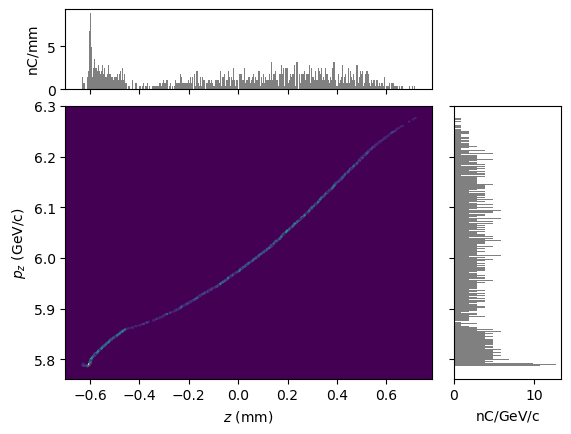

761.7270490877029


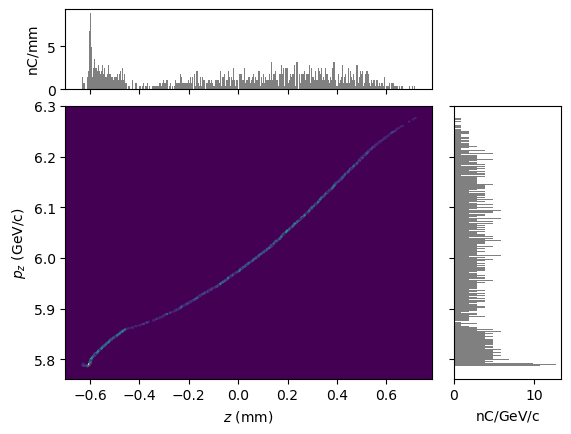

In [4]:
activeSettings = importedDefaultSettings | { "L1PhaseSet" : -20, "L2PhaseSet" : -45 }

setLattice(tao, **activeSettings)
trackBeam(tao, **activeSettings)
P = getBeamAtElement(tao, "BEGBC20")
display(plotMod(P, 'z', 'pz', bins=300))

PDrive, PWitness = getDriverAndWitness(P)
print( 1e6 * (np.median(PDrive.z) - np.median(PWitness.z)) ) 




In [5]:
results = []

for linearCompressionTerm in np.arange( -20e-3, 20e-3, 0.2e-3 ):
    for quadraticCompressionTerm in np.arange( -0.5, 0.5, 0.005 ):
        
        
        PMod = P.copy()
        
        meanPz = np.mean( PMod.pz ) 
        normalizedPz = ( PMod.pz - meanPz ) / meanPz
        PMod.z = PMod.z + linearCompressionTerm * normalizedPz + quadraticCompressionTerm * normalizedPz ** 2

        # print(linearCompressionTerm, ", ", quadraticCompressionTerm) 
        # display(plotMod(PMod, 'z', 'pz', bins=300))
        # plt.clf()
        
        PDrive, PWitness = getDriverAndWitness(PMod)
        #print( 1e6 * (np.median(PDrive.z) - np.median(PWitness.z)) )

        driverLength = smallestIntervalImpliedSigma( PDrive.z )
        witnessLength = smallestIntervalImpliedSigma( PWitness.z )
        
        results.append(
            {
                "linearCompressionTerm" : linearCompressionTerm,
                "quadraticCompressionTerm" : quadraticCompressionTerm, 
                "spacingUm" : 1e6 * (np.median(PDrive.z) - np.median(PWitness.z)),
                "driverLength" : driverLength,
                "witnessLength" : witnessLength,
                "longestBunchLength" : max(driverLength, witnessLength)
            }
        )
    

{'linearCompressionTerm': -0.01700000000000002, 'quadraticCompressionTerm': 0.045000000000000484, 'spacingUm': 49.379860877474655, 'driverLength': 2.5376836878284915e-05, 'witnessLength': 2.444266393045323e-05, 'longestBunchLength': 2.5376836878284915e-05}


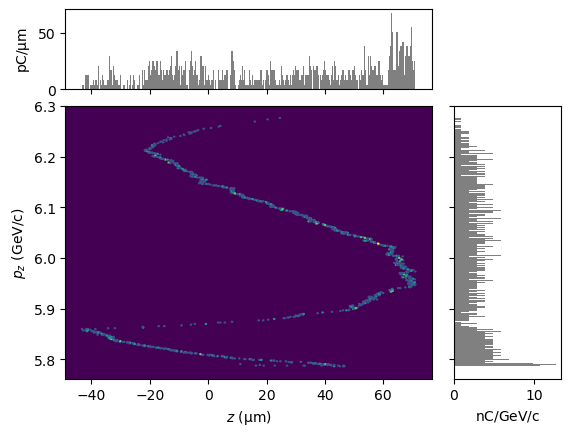

In [6]:
targetSpacingUm = 40

def getBestCase(results):

    subset = [ row for row in results if (row["spacingUm"] - targetSpacingUm) < 10 ]
    
    bestDict = {}
    bestSetting = 1e9
    
    for row in subset:
        if row["longestBunchLength"] < bestSetting:
            bestSetting = row["longestBunchLength"]
            bestDict = row

    return bestDict


bestDict = getBestCase(results)

print(bestDict)

linearCompressionTerm = bestDict["linearCompressionTerm"]
quadraticCompressionTerm = bestDict["quadraticCompressionTerm"]



PMod = P.copy()

meanPz = np.mean( PMod.pz ) 
normalizedPz = ( PMod.pz - meanPz ) / meanPz
PMod.z = PMod.z + linearCompressionTerm * normalizedPz + quadraticCompressionTerm * normalizedPz ** 2

#print(linearCompressionTerm, ", ", quadraticCompressionTerm) 
display(plotMod(PMod, 'z', 'pz', bins=300))
plt.clf()

PDrive, PWitness = getDriverAndWitness(PMod)

In [7]:
# targetSpacing = 40e-6
# bestResult = min(results, key=lambda x: ( x[1] - targetSpacing ) ** 2)
# print(bestResult)
# bestR56 = bestResult[0]


# PMod = P.copy()
    
# meanPz = np.mean( PMod.pz ) 
# PMod.z = PMod.z + ( bestR56 ) * ( PMod.pz - meanPz ) / meanPz

# display(plotMod(PMod, 'z', 'pz', bins=300))
# plt.clf()


## Automate




-40 -50



-40 -48
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.0600000000000005, 'spacingUm': 31.197038843614028, 'driverLength': 9.083299776437824e-06, 'witnessLength': 6.640912624594928e-06, 'longestBunchLength': 9.083299776437824e-06}


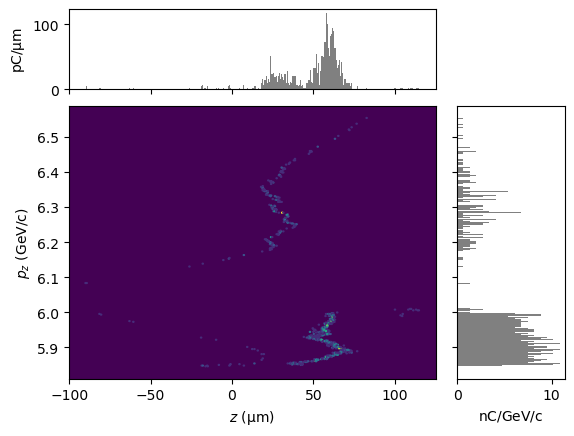




-40 -46
{'linearCompressionTerm': -0.019000000000000006, 'quadraticCompressionTerm': 0.07500000000000051, 'spacingUm': 47.561055216165435, 'driverLength': 1.3567833463572822e-05, 'witnessLength': 1.3613520984613513e-05, 'longestBunchLength': 1.3613520984613513e-05}


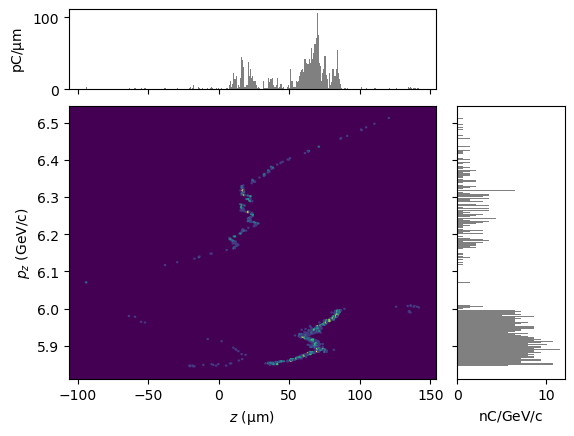




-40 -44
{'linearCompressionTerm': -0.017600000000000015, 'quadraticCompressionTerm': 0.09000000000000052, 'spacingUm': 45.90461468966967, 'driverLength': 2.4085401765194783e-05, 'witnessLength': 2.1354663499868497e-05, 'longestBunchLength': 2.4085401765194783e-05}


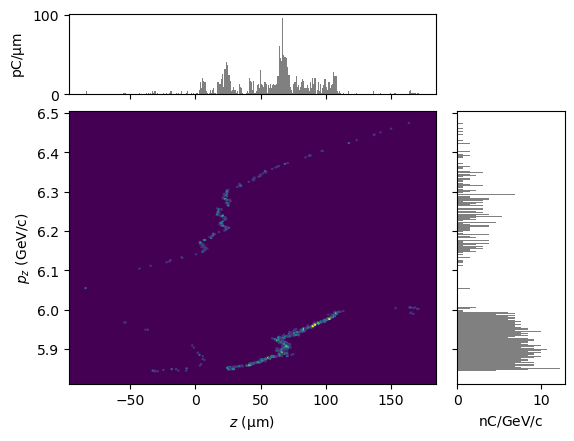




-40 -42
{'linearCompressionTerm': -0.016200000000000023, 'quadraticCompressionTerm': 0.11500000000000055, 'spacingUm': 43.59953089922206, 'driverLength': 3.35081173331421e-05, 'witnessLength': 3.4014595630993044e-05, 'longestBunchLength': 3.4014595630993044e-05}


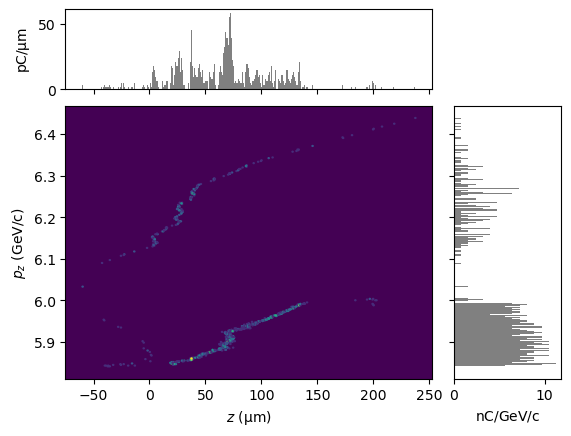




-40 -40
{'linearCompressionTerm': -0.014800000000000032, 'quadraticCompressionTerm': 0.14500000000000057, 'spacingUm': 44.94230964883141, 'driverLength': 4.2517211133361675e-05, 'witnessLength': 4.4367702102589186e-05, 'longestBunchLength': 4.4367702102589186e-05}


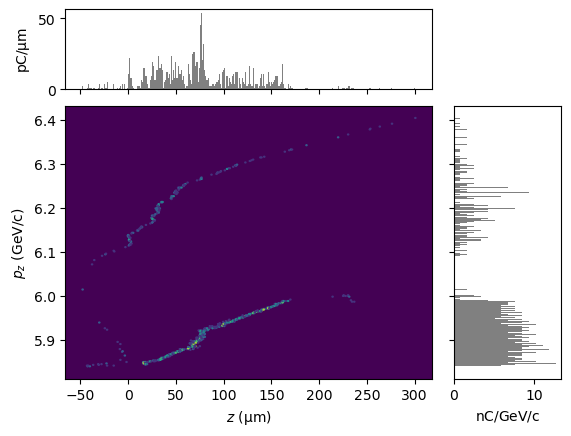




-40 -38
{'linearCompressionTerm': -0.01340000000000004, 'quadraticCompressionTerm': 0.1850000000000006, 'spacingUm': 45.49956862201673, 'driverLength': 5.0299880281425316e-05, 'witnessLength': 5.061203982038465e-05, 'longestBunchLength': 5.061203982038465e-05}


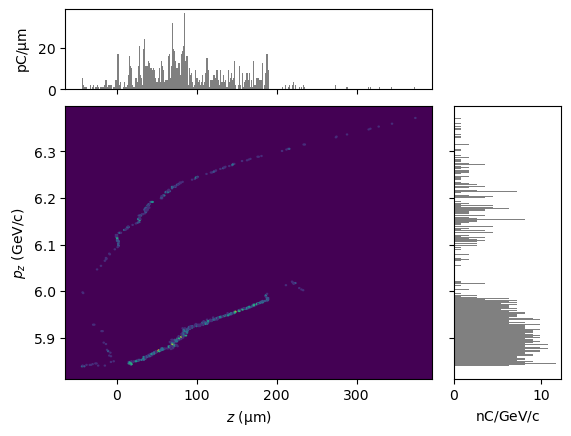




-40 -36
{'linearCompressionTerm': -0.011400000000000052, 'quadraticCompressionTerm': 0.21500000000000064, 'spacingUm': 45.264840339866204, 'driverLength': 5.2589133570767315e-05, 'witnessLength': 5.198096722036968e-05, 'longestBunchLength': 5.2589133570767315e-05}


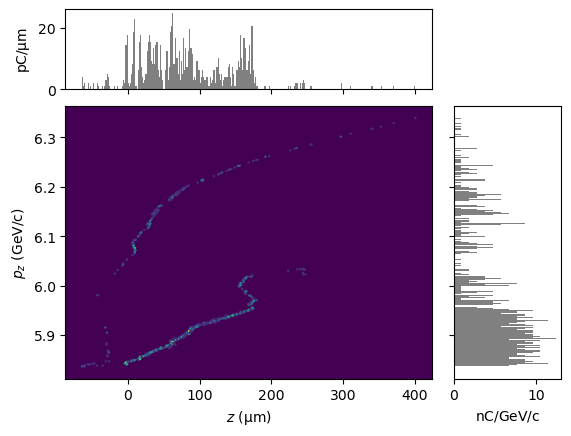




-40 -34
{'linearCompressionTerm': -0.009400000000000065, 'quadraticCompressionTerm': 0.2850000000000007, 'spacingUm': 48.96334234222381, 'driverLength': 5.820627340511347e-05, 'witnessLength': 5.6151543978108555e-05, 'longestBunchLength': 5.820627340511347e-05}


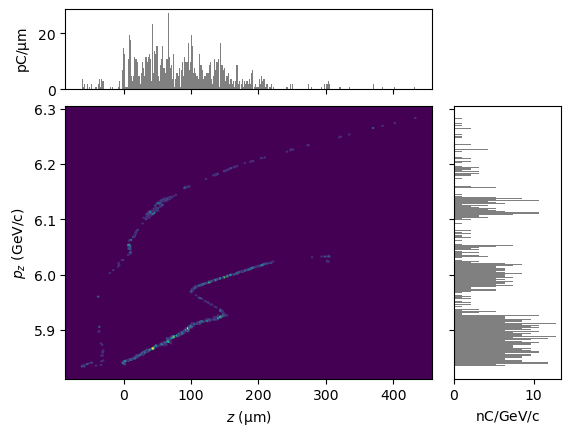




-40 -32
{'linearCompressionTerm': -0.008000000000000073, 'quadraticCompressionTerm': 0.4850000000000009, 'spacingUm': 48.838442669138594, 'driverLength': 5.860656869085033e-05, 'witnessLength': 4.088357710878417e-05, 'longestBunchLength': 5.860656869085033e-05}


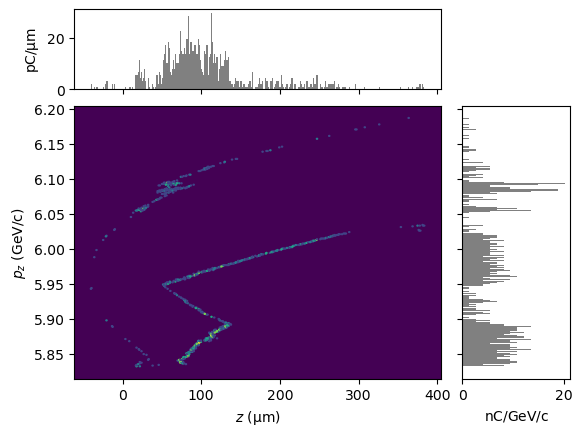




-40 -30
{'linearCompressionTerm': -0.0036000000000000996, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 47.073413214498, 'driverLength': 9.277749552676531e-05, 'witnessLength': 1.5032828400754299e-05, 'longestBunchLength': 9.277749552676531e-05}


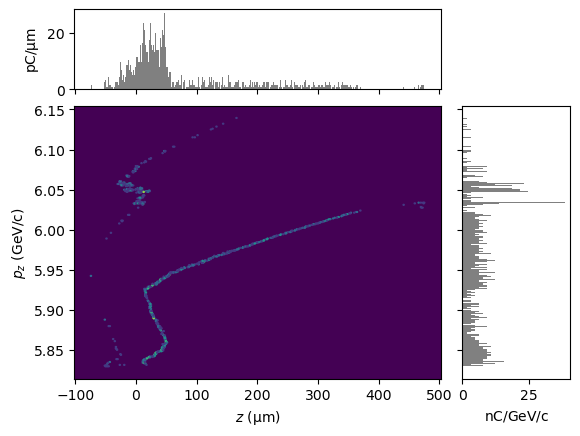




-40 -28
{'linearCompressionTerm': 0.005199999999999847, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 48.142777760994726, 'driverLength': 0.00017686616084101525, 'witnessLength': 2.3381385040172796e-05, 'longestBunchLength': 0.00017686616084101525}


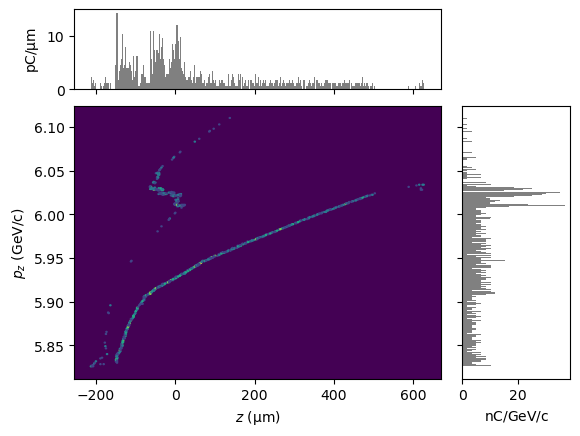




-40 -26
{'linearCompressionTerm': 0.01779999999999977, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 49.32173845868382, 'driverLength': 0.0002932742288631753, 'witnessLength': 2.7561497891597436e-05, 'longestBunchLength': 0.0002932742288631753}


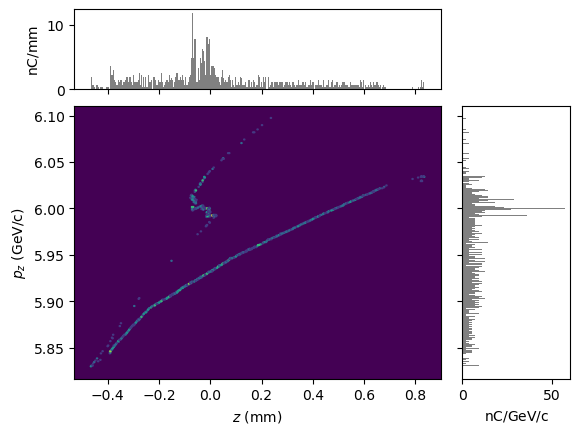




-40 -24
FAILED



-40 -22
FAILED



-40 -20
FAILED



-40 -18
FAILED



-40 -16
FAILED



-40 -14
FAILED



-40 -12
FAILED



-40 -10
FAILED



-40 -8
FAILED



-40 -6
FAILED



-40 -4
FAILED



-40 -2
FAILED



-38 -50



-38 -48



-38 -46
{'linearCompressionTerm': -0.016200000000000023, 'quadraticCompressionTerm': 0.035000000000000475, 'spacingUm': 47.21683557596808, 'driverLength': 8.579125683462224e-06, 'witnessLength': 8.652755255955842e-06, 'longestBunchLength': 8.652755255955842e-06}


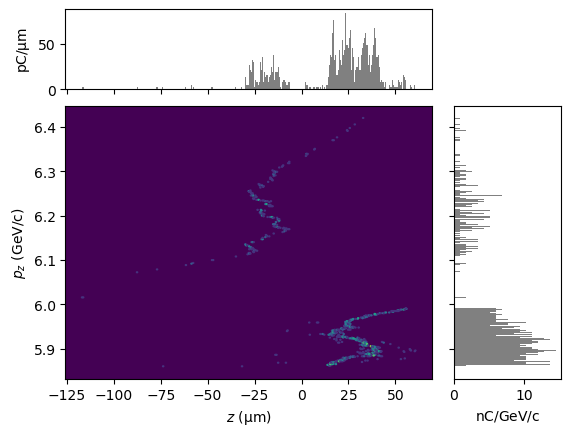




-38 -44
{'linearCompressionTerm': -0.014800000000000032, 'quadraticCompressionTerm': 0.05500000000000049, 'spacingUm': 49.23627724768397, 'driverLength': 1.774714281939954e-05, 'witnessLength': 1.8413864833824158e-05, 'longestBunchLength': 1.8413864833824158e-05}


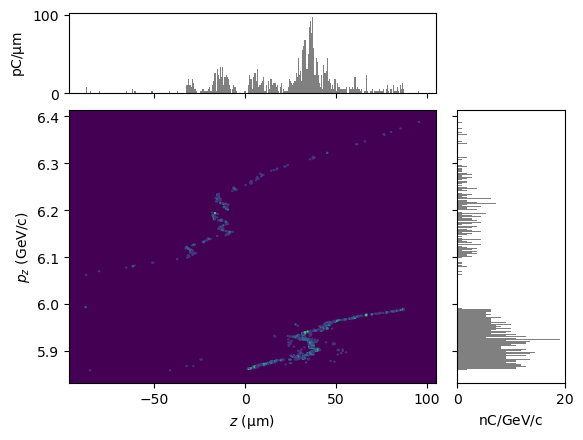




-38 -42
{'linearCompressionTerm': -0.013200000000000042, 'quadraticCompressionTerm': 0.08000000000000052, 'spacingUm': 44.587142760959075, 'driverLength': 3.016624743429941e-05, 'witnessLength': 2.961548739776141e-05, 'longestBunchLength': 3.016624743429941e-05}


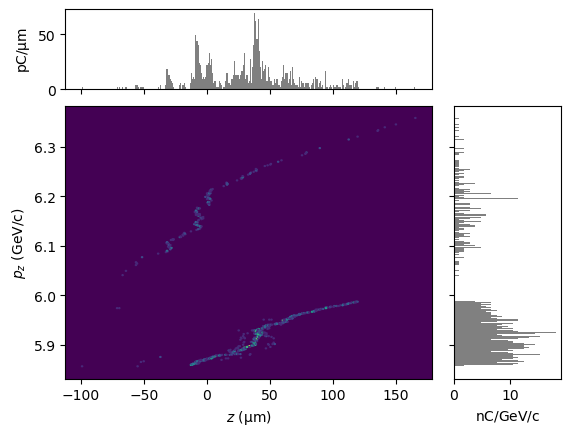




-38 -40
{'linearCompressionTerm': -0.012000000000000049, 'quadraticCompressionTerm': 0.12500000000000056, 'spacingUm': 49.90629487305906, 'driverLength': 3.798955660887794e-05, 'witnessLength': 3.824901936233142e-05, 'longestBunchLength': 3.824901936233142e-05}


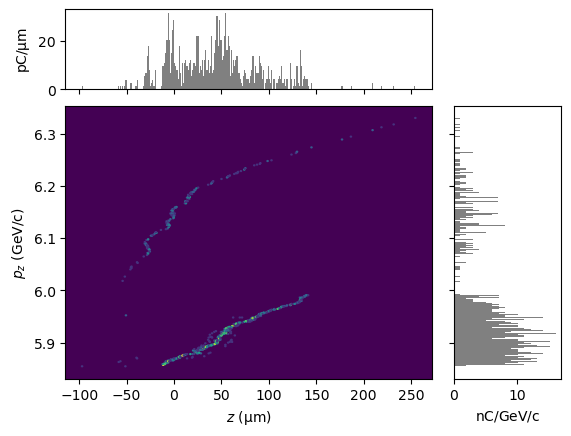




-38 -38
{'linearCompressionTerm': -0.010400000000000059, 'quadraticCompressionTerm': 0.1650000000000006, 'spacingUm': 49.50391181288831, 'driverLength': 4.48057335753643e-05, 'witnessLength': 4.390438424858864e-05, 'longestBunchLength': 4.48057335753643e-05}


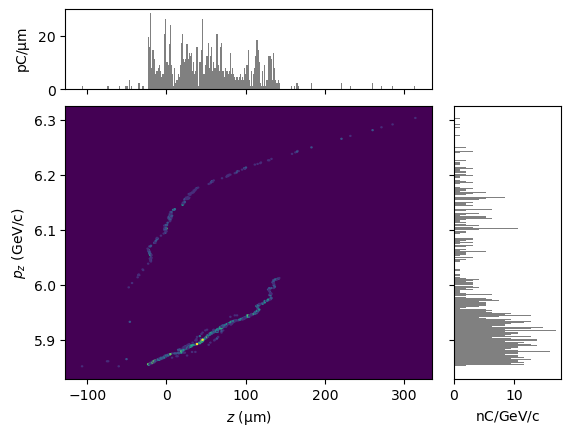




-38 -36
{'linearCompressionTerm': -0.00840000000000007, 'quadraticCompressionTerm': 0.22000000000000064, 'spacingUm': 49.46754262293689, 'driverLength': 4.852749854285078e-05, 'witnessLength': 5.024817955649766e-05, 'longestBunchLength': 5.024817955649766e-05}


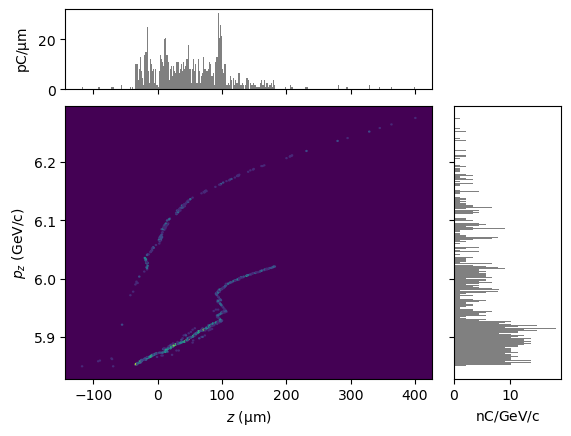




-38 -34
{'linearCompressionTerm': -0.006400000000000083, 'quadraticCompressionTerm': 0.34000000000000075, 'spacingUm': 49.719239455549925, 'driverLength': 5.894789063418287e-05, 'witnessLength': 5.856686575444031e-05, 'longestBunchLength': 5.894789063418287e-05}


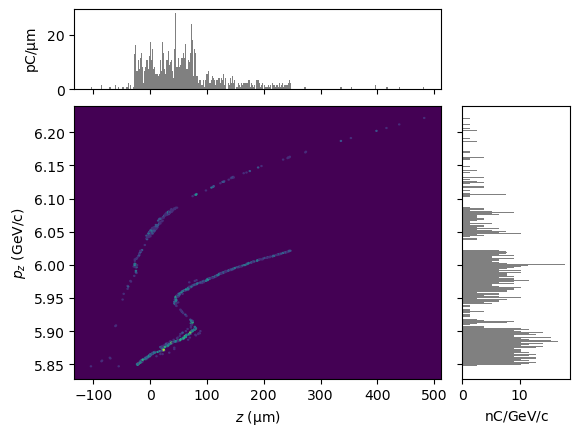




-38 -32
{'linearCompressionTerm': -0.0026000000000001057, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 49.18494982161549, 'driverLength': 8.118473668380844e-05, 'witnessLength': 3.383413268151316e-05, 'longestBunchLength': 8.118473668380844e-05}


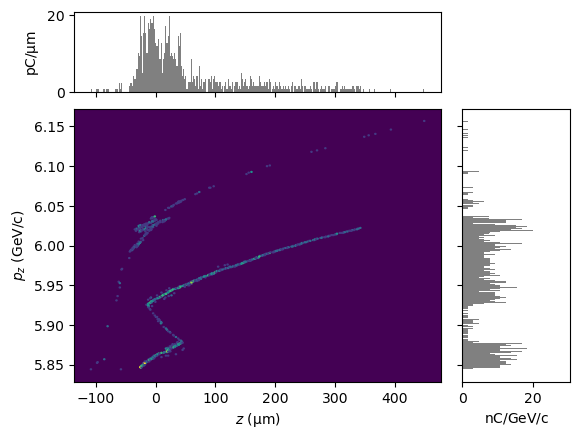




-38 -30
{'linearCompressionTerm': 0.006799999999999837, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 49.10644161929054, 'driverLength': 0.0001606728341470616, 'witnessLength': 2.1029231064365424e-05, 'longestBunchLength': 0.0001606728341470616}


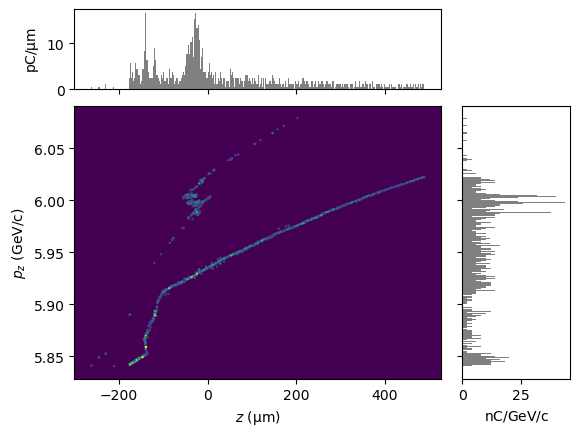




-38 -28
FAILED



-38 -26
FAILED



-38 -24
FAILED



-38 -22
FAILED



-38 -20
FAILED



-38 -18
FAILED



-38 -16
FAILED



-38 -14
FAILED



-38 -12
FAILED



-38 -10
FAILED



-38 -8
FAILED



-38 -6
FAILED



-38 -4
FAILED



-38 -2
FAILED



-36 -50



-36 -48



-36 -46
{'linearCompressionTerm': -0.011200000000000054, 'quadraticCompressionTerm': -0.05999999999999961, 'spacingUm': 42.83444415819418, 'driverLength': 1.0505928689988787e-05, 'witnessLength': 7.833939975693774e-06, 'longestBunchLength': 1.0505928689988787e-05}


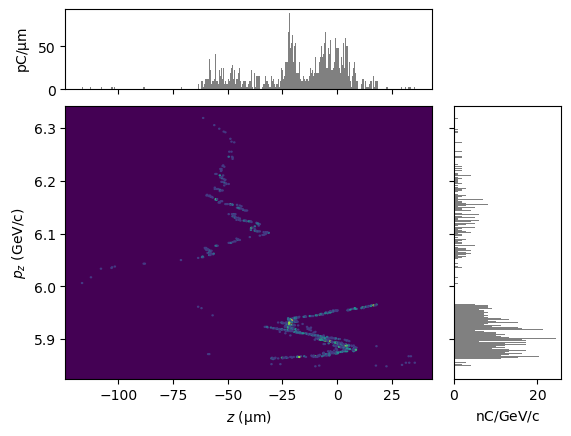




-36 -44
{'linearCompressionTerm': -0.010400000000000059, 'quadraticCompressionTerm': -0.019999999999999574, 'spacingUm': 49.40578105457366, 'driverLength': 1.7668945719481216e-05, 'witnessLength': 1.6147006049059545e-05, 'longestBunchLength': 1.7668945719481216e-05}


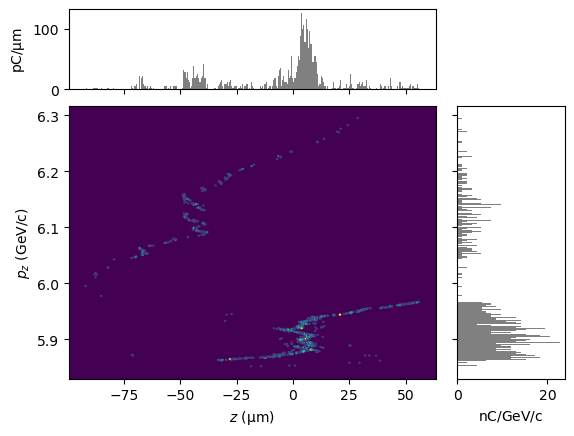




-36 -42
{'linearCompressionTerm': -0.009200000000000066, 'quadraticCompressionTerm': 0.035000000000000475, 'spacingUm': 49.66769438561648, 'driverLength': 2.6742098834396714e-05, 'witnessLength': 2.536240768373548e-05, 'longestBunchLength': 2.6742098834396714e-05}


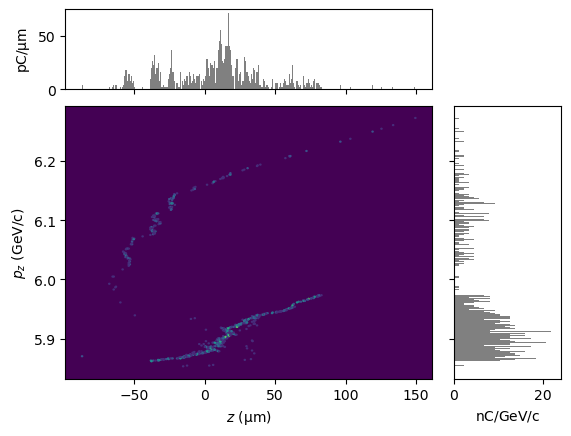




-36 -40
{'linearCompressionTerm': -0.008000000000000073, 'quadraticCompressionTerm': 0.10000000000000053, 'spacingUm': 48.62384607172059, 'driverLength': 3.257652006526526e-05, 'witnessLength': 3.42307748197664e-05, 'longestBunchLength': 3.42307748197664e-05}


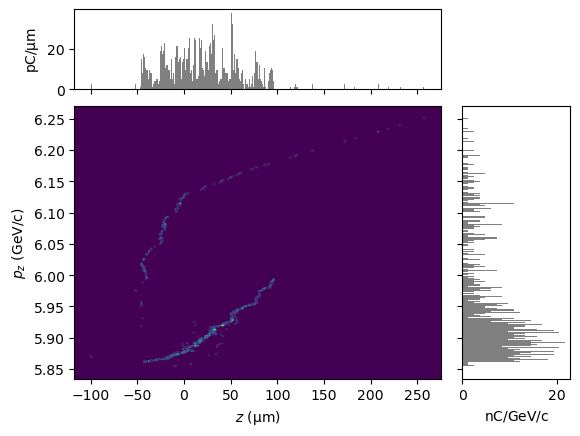




-36 -38
{'linearCompressionTerm': -0.006400000000000083, 'quadraticCompressionTerm': 0.1650000000000006, 'spacingUm': 49.88606790927623, 'driverLength': 4.2858555411206923e-05, 'witnessLength': 4.276481566541026e-05, 'longestBunchLength': 4.2858555411206923e-05}


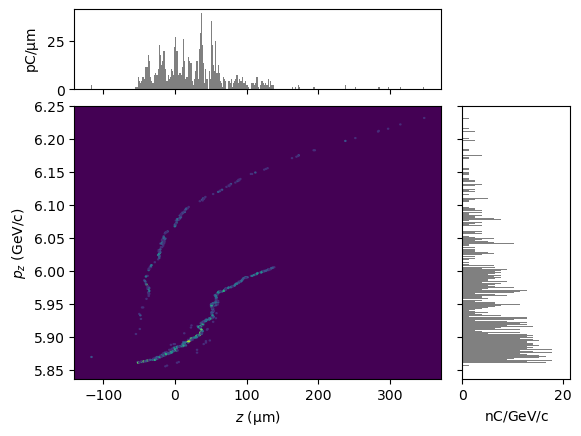




-36 -36
{'linearCompressionTerm': -0.004600000000000094, 'quadraticCompressionTerm': 0.3100000000000007, 'spacingUm': 48.81544742294244, 'driverLength': 5.4813867086007776e-05, 'witnessLength': 5.438305111930507e-05, 'longestBunchLength': 5.4813867086007776e-05}


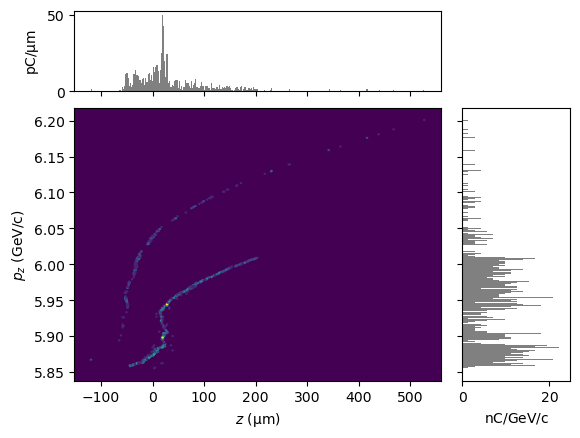




-36 -34
{'linearCompressionTerm': 0.0017999999999998677, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 49.43229112843054, 'driverLength': 9.684968658897934e-05, 'witnessLength': 7.555876368305542e-05, 'longestBunchLength': 9.684968658897934e-05}


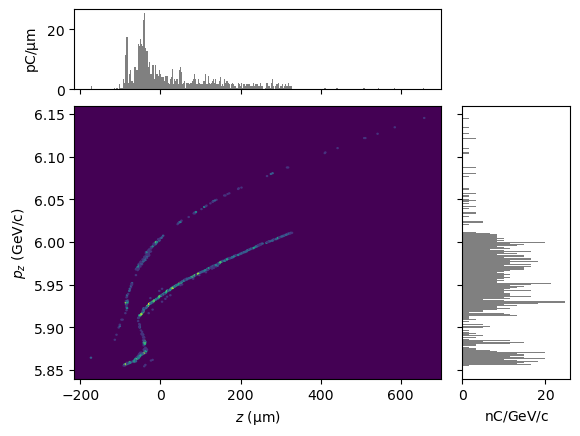




-36 -32
FAILED



-36 -30
FAILED



-36 -28
FAILED



-36 -26
FAILED



-36 -24
FAILED



-36 -22
FAILED



-36 -20
FAILED



-36 -18
FAILED



-36 -16
FAILED



-36 -14
FAILED



-36 -12
FAILED



-36 -10
FAILED



-36 -8
FAILED



-36 -6
FAILED



-36 -4
FAILED



-36 -2
FAILED



-34 -50
{'linearCompressionTerm': -0.00860000000000007, 'quadraticCompressionTerm': -0.19999999999999973, 'spacingUm': 38.76230660240373, 'driverLength': 1.350847568083979e-05, 'witnessLength': 1.3581955195095644e-05, 'longestBunchLength': 1.3581955195095644e-05}


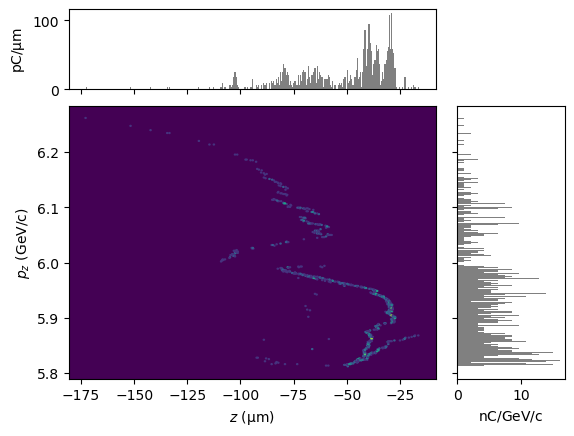




-34 -48



-34 -46
{'linearCompressionTerm': -0.004000000000000097, 'quadraticCompressionTerm': -0.20499999999999974, 'spacingUm': 31.367505664401328, 'driverLength': 1.3060755550582025e-05, 'witnessLength': 1.2849900730013859e-05, 'longestBunchLength': 1.3060755550582025e-05}


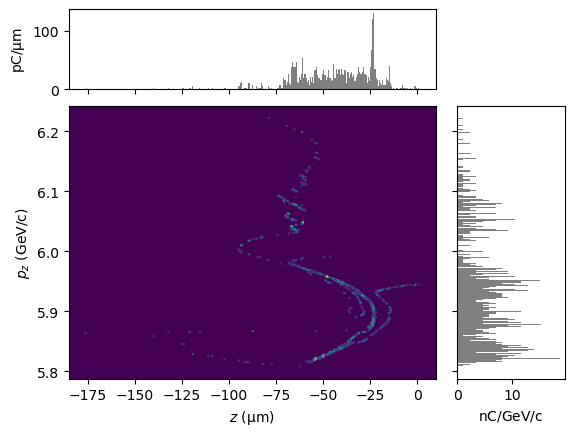




-34 -44
{'linearCompressionTerm': -0.0030000000000001033, 'quadraticCompressionTerm': -0.1649999999999997, 'spacingUm': 47.917377236287386, 'driverLength': 1.527740749701378e-05, 'witnessLength': 1.517081903855429e-05, 'longestBunchLength': 1.527740749701378e-05}


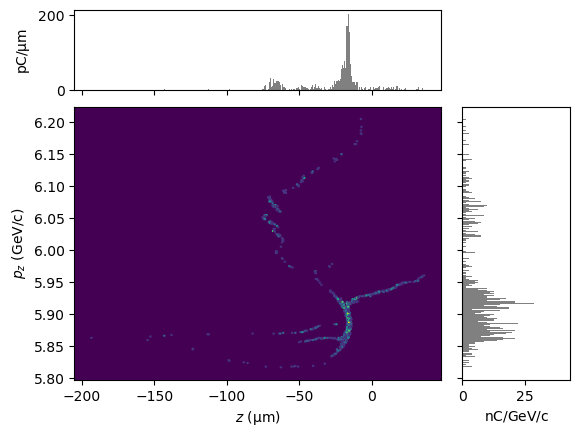




-34 -42
{'linearCompressionTerm': -0.003200000000000102, 'quadraticCompressionTerm': -0.08999999999999964, 'spacingUm': 49.455155219131335, 'driverLength': 2.0582349264631868e-05, 'witnessLength': 2.2358374603607365e-05, 'longestBunchLength': 2.2358374603607365e-05}


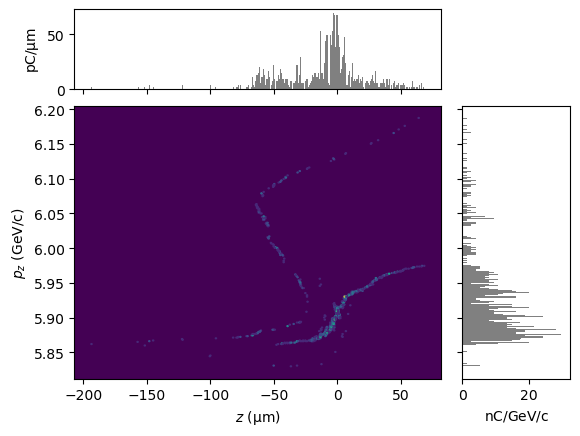




-34 -40
{'linearCompressionTerm': -0.00860000000000007, 'quadraticCompressionTerm': 0.24000000000000066, 'spacingUm': 49.96848042852154, 'driverLength': 1.2813565886650673e-05, 'witnessLength': 2.0332280501545474e-05, 'longestBunchLength': 2.0332280501545474e-05}


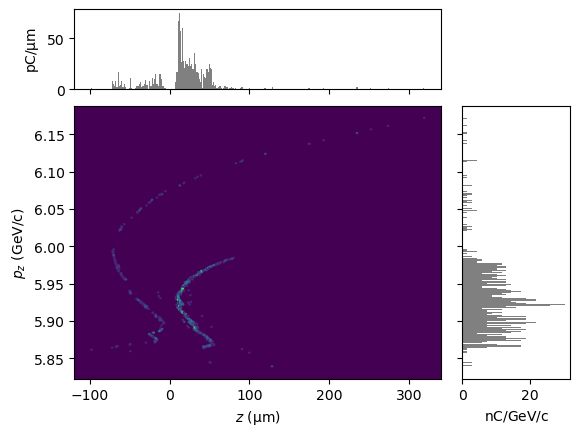




-34 -38
{'linearCompressionTerm': -0.017200000000000017, 'quadraticCompressionTerm': 0.4900000000000009, 'spacingUm': 49.92478479486583, 'driverLength': 2.0604814548583075e-05, 'witnessLength': 6.357623793676243e-05, 'longestBunchLength': 6.357623793676243e-05}


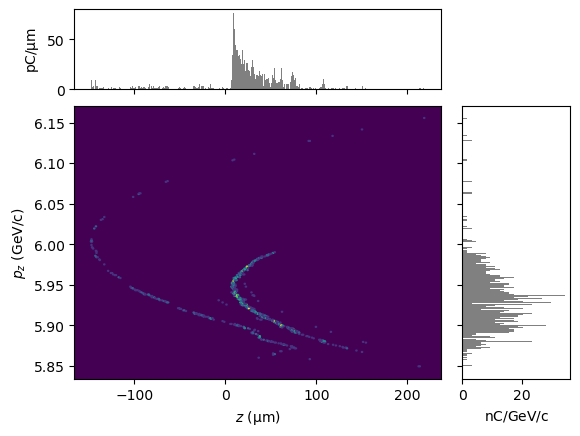




-34 -36
FAILED



-34 -34
FAILED



-34 -32
FAILED



-34 -30
FAILED



-34 -28
FAILED



-34 -26
FAILED



-34 -24
FAILED



-34 -22
FAILED



-34 -20
FAILED



-34 -18
FAILED



-34 -16
FAILED



-34 -14
FAILED



-34 -12
FAILED



-34 -10
FAILED



-34 -8
FAILED



-34 -6
FAILED



-34 -4
FAILED



-34 -2
FAILED



-32 -50
{'linearCompressionTerm': -0.00680000000000008, 'quadraticCompressionTerm': -0.024999999999999578, 'spacingUm': 43.28255773227319, 'driverLength': 1.0862825808230274e-05, 'witnessLength': 1.1057750990902534e-05, 'longestBunchLength': 1.1057750990902534e-05}


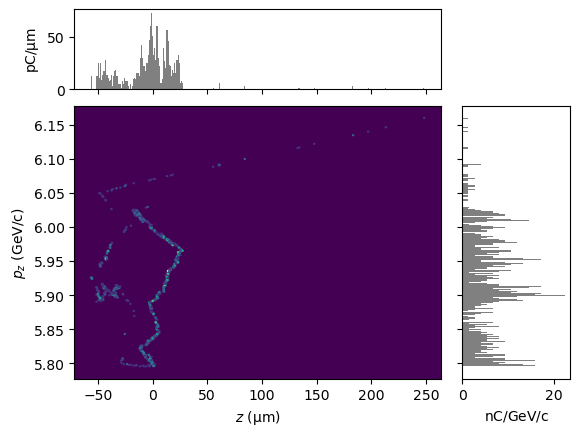




-32 -48
{'linearCompressionTerm': -0.005800000000000086, 'quadraticCompressionTerm': -0.01499999999999957, 'spacingUm': 46.32866398354696, 'driverLength': 1.0281573123084442e-05, 'witnessLength': 1.036974107235194e-05, 'longestBunchLength': 1.036974107235194e-05}


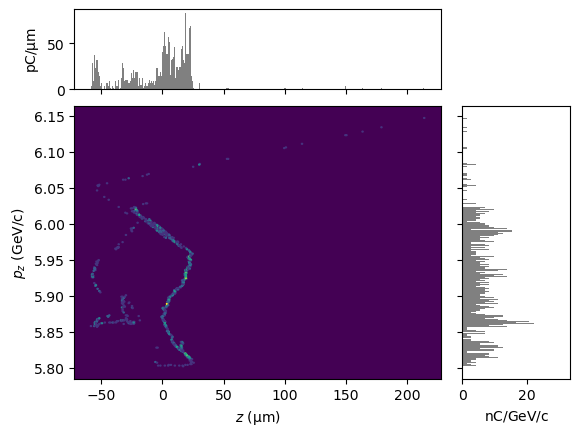




-32 -46
{'linearCompressionTerm': -0.008200000000000072, 'quadraticCompressionTerm': 0.33000000000000074, 'spacingUm': 49.907529602162114, 'driverLength': 4.194334417047653e-05, 'witnessLength': 2.5530638412979248e-05, 'longestBunchLength': 4.194334417047653e-05}


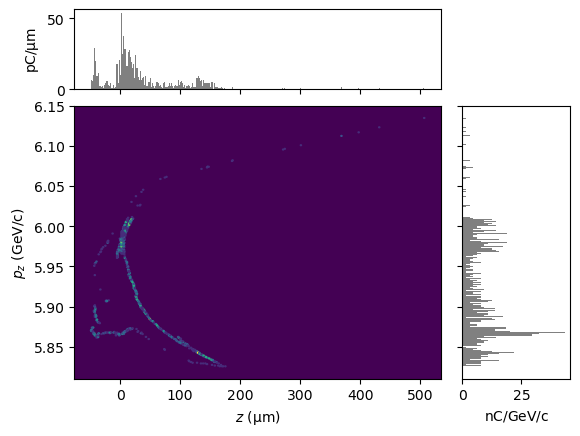




-32 -44
{'linearCompressionTerm': -0.009600000000000063, 'quadraticCompressionTerm': 0.3700000000000008, 'spacingUm': 49.94963834537727, 'driverLength': 5.887732560043103e-05, 'witnessLength': 3.180721484133719e-05, 'longestBunchLength': 5.887732560043103e-05}


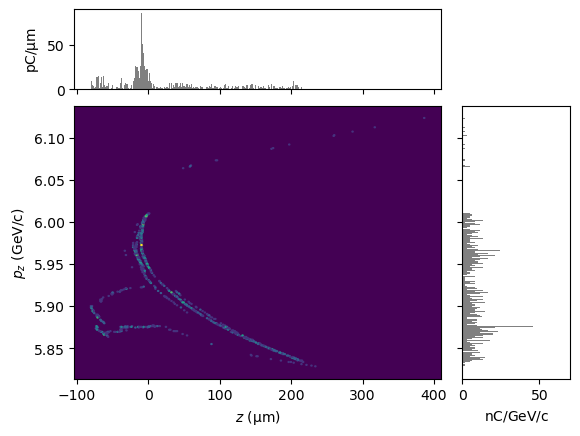




-32 -42
FAILED



-32 -40
{'linearCompressionTerm': -0.019400000000000004, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 49.275496621041945, 'driverLength': 1.998874336619425e-05, 'witnessLength': 4.964324537646731e-05, 'longestBunchLength': 4.964324537646731e-05}


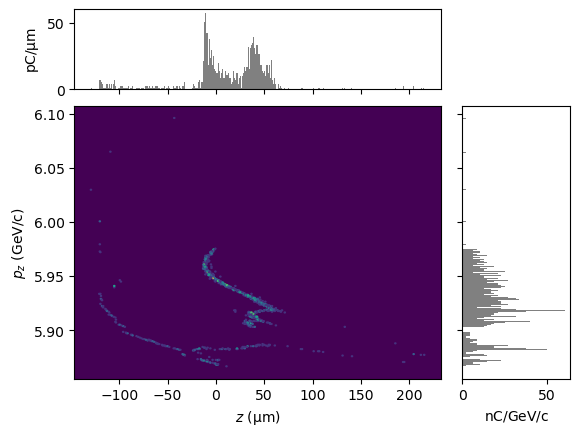




-32 -38
FAILED



-32 -36
FAILED



-32 -34
FAILED



-32 -32
FAILED



-32 -30
FAILED



-32 -28
FAILED



-32 -26
FAILED



-32 -24
FAILED



-32 -22
FAILED



-32 -20
FAILED



-32 -18
FAILED



-32 -16
FAILED



-32 -14
FAILED



-32 -12
FAILED



-32 -10
FAILED



-32 -8
FAILED



-32 -6
FAILED



-32 -4
FAILED



-32 -2
FAILED



-30 -50
{'linearCompressionTerm': -0.007400000000000077, 'quadraticCompressionTerm': -0.029999999999999583, 'spacingUm': 49.60815283818785, 'driverLength': 1.8323783464175382e-05, 'witnessLength': 1.4473448656555342e-05, 'longestBunchLength': 1.8323783464175382e-05}


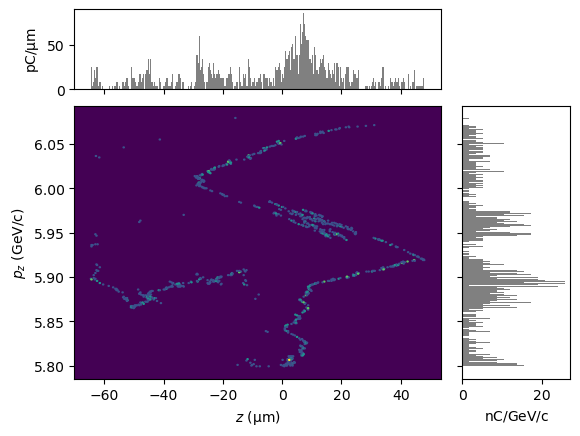




-30 -48
{'linearCompressionTerm': -0.0066000000000000815, 'quadraticCompressionTerm': 0.11000000000000054, 'spacingUm': 49.89548575009149, 'driverLength': 1.690282302904508e-05, 'witnessLength': 1.7861698807310206e-05, 'longestBunchLength': 1.7861698807310206e-05}


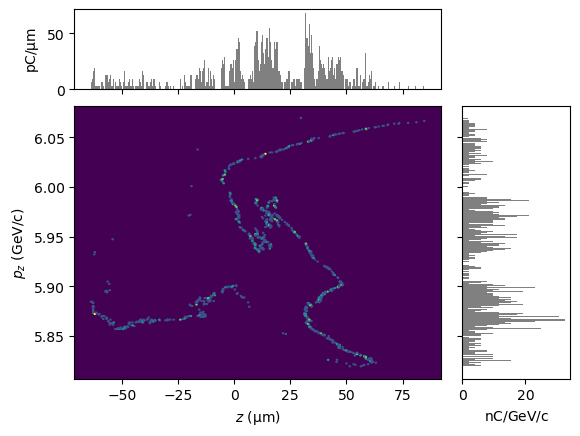




-30 -46
{'linearCompressionTerm': -0.007200000000000078, 'quadraticCompressionTerm': 0.03000000000000047, 'spacingUm': 49.86863130864898, 'driverLength': 3.4860506832288e-05, 'witnessLength': 3.708736223336513e-05, 'longestBunchLength': 3.708736223336513e-05}


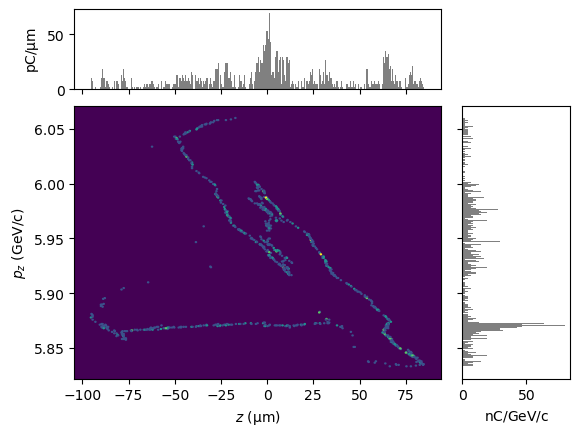




-30 -44
{'linearCompressionTerm': -0.009600000000000063, 'quadraticCompressionTerm': -0.019999999999999574, 'spacingUm': 49.81939961771162, 'driverLength': 4.7002422127691426e-05, 'witnessLength': 4.8471559289665156e-05, 'longestBunchLength': 4.8471559289665156e-05}


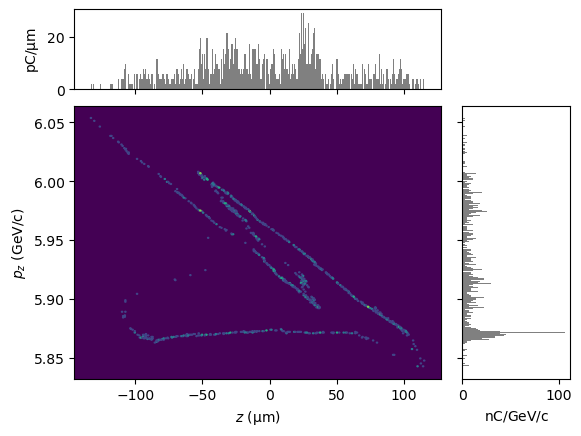




-30 -42
{'linearCompressionTerm': -0.009200000000000066, 'quadraticCompressionTerm': 0.22000000000000064, 'spacingUm': 47.92827680885731, 'driverLength': 3.366376393990448e-05, 'witnessLength': 5.065194050503355e-05, 'longestBunchLength': 5.065194050503355e-05}


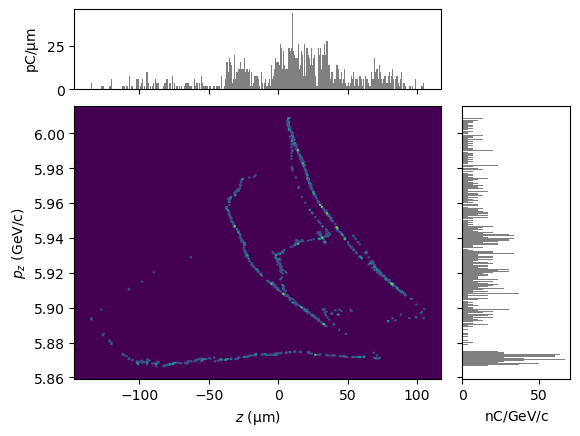




-30 -40
{'linearCompressionTerm': -0.009800000000000062, 'quadraticCompressionTerm': 0.4850000000000009, 'spacingUm': 48.069943066742745, 'driverLength': 4.1558930832587087e-05, 'witnessLength': 5.258440497199372e-05, 'longestBunchLength': 5.258440497199372e-05}


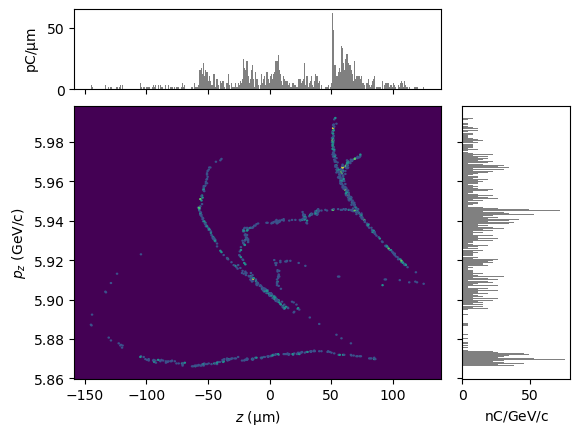




-30 -38



-30 -36



-30 -34



-30 -32



-30 -30



-30 -28
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': -0.13999999999999968, 'spacingUm': 43.00924450755486, 'driverLength': 5.7172362357322934e-05, 'witnessLength': 5.7258729520126043e-05, 'longestBunchLength': 5.7258729520126043e-05}


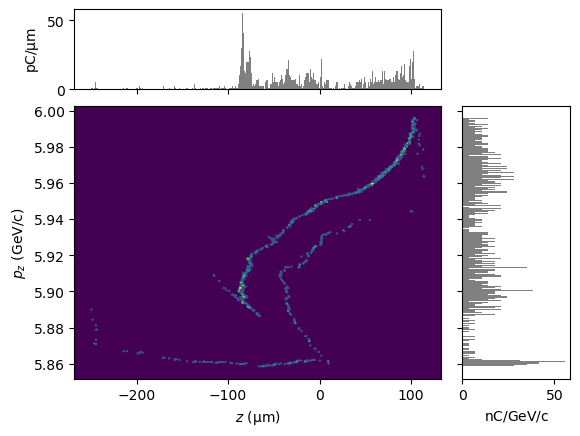




-30 -26
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': -0.0499999999999996, 'spacingUm': 49.91095633308839, 'driverLength': 6.847818892272721e-05, 'witnessLength': 5.790826451357068e-05, 'longestBunchLength': 6.847818892272721e-05}


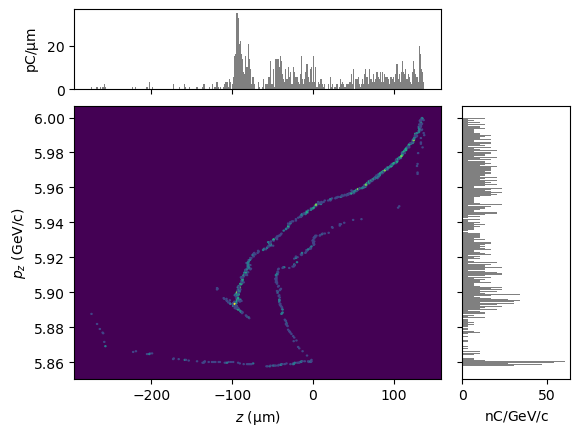




-30 -24
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.11000000000000054, 'spacingUm': 49.81574968085654, 'driverLength': 8.055281933541722e-05, 'witnessLength': 5.5123046521114456e-05, 'longestBunchLength': 8.055281933541722e-05}


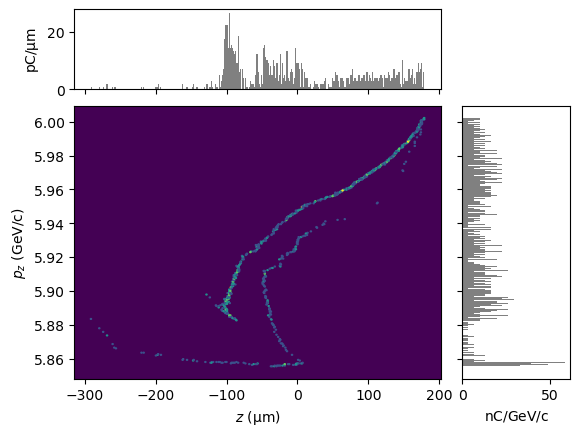




-30 -22
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.32500000000000073, 'spacingUm': 49.69496544660663, 'driverLength': 9.249478313232822e-05, 'witnessLength': 4.8645332269662054e-05, 'longestBunchLength': 9.249478313232822e-05}


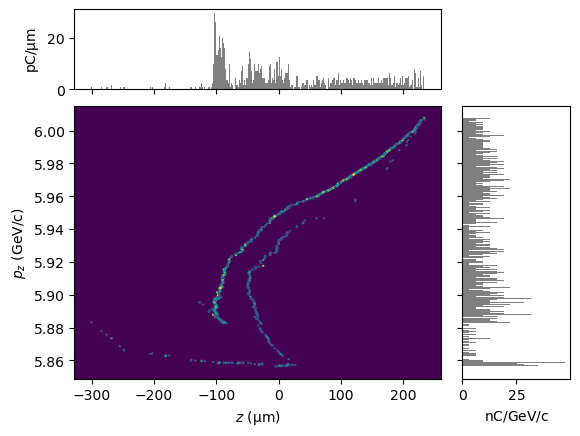




-30 -20
FAILED



-30 -18
FAILED



-30 -16
FAILED



-30 -14
FAILED



-30 -12
FAILED



-30 -10
FAILED



-30 -8
FAILED



-30 -6
FAILED



-30 -4
FAILED



-30 -2
FAILED



-28 -50



-28 -48
{'linearCompressionTerm': -0.009000000000000067, 'quadraticCompressionTerm': 0.04000000000000048, 'spacingUm': 44.84482969492532, 'driverLength': 2.6938822165110025e-05, 'witnessLength': 2.6982495576716152e-05, 'longestBunchLength': 2.6982495576716152e-05}


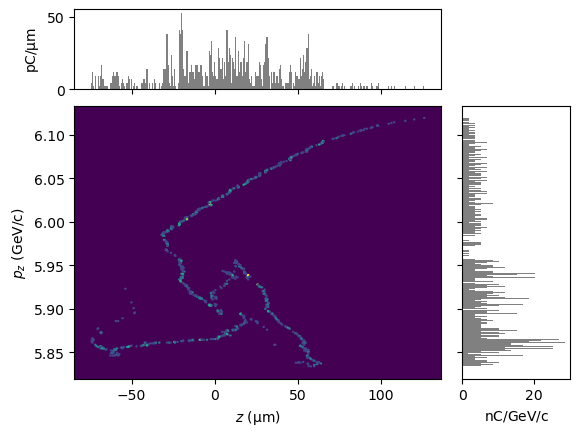




-28 -46



-28 -44



-28 -42



-28 -40



-28 -38



-28 -36



-28 -34



-28 -32



-28 -30



-28 -28



-28 -26



-28 -24



-28 -22



-28 -20



-28 -18



-28 -16



-28 -14



-28 -12



-28 -10



-28 -8



-28 -6



-28 -4



-28 -2



-26 -50



-26 -48



-26 -46



-26 -44



-26 -42



-26 -40



-26 -38



-26 -36



-26 -34



-26 -32



-26 -30



-26 -28



-26 -26



-26 -24



-26 -22



-26 -20



-26 -18



-26 -16



-26 -14



-26 -12



-26 -10



-26 -8



-26 -6



-26 -4



-26 -2



-24 -50



-24 -48



-24 -46



-24 -44



-24 -42



-24 -40



-24 -38



-24 -36



-24 -34



-24 -32



-24 -30



-24 -28



-24 -26



-24 -24



-24 -22



-24 -20



-24 -18



-24 -16



-24 -14



-24 -12



-24 -10



-24 -8



-24 -6



-24 -4



-24 -2



-22 -50
{'linearCompressionTerm': -0.0198, 'quadraticCompressionTerm': -0.00499999999999956, 'spacingUm': 47.880351681590234, 'driverLength': 3.241359941523456e-05, 'witnessLength': 3.251800749045853e-05, '

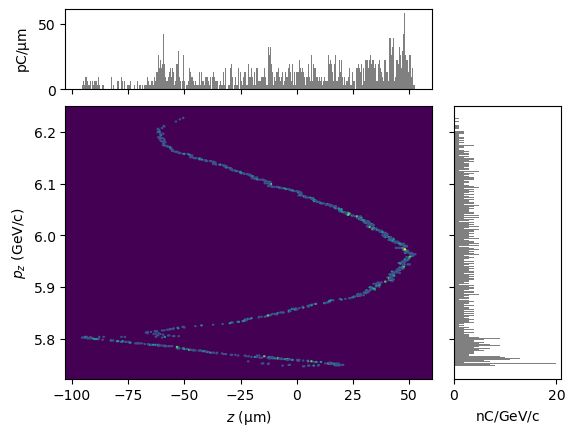




-22 -48
{'linearCompressionTerm': -0.017600000000000015, 'quadraticCompressionTerm': -0.01499999999999957, 'spacingUm': 47.921038444397844, 'driverLength': 3.080559439899407e-05, 'witnessLength': 3.0189519393853534e-05, 'longestBunchLength': 3.080559439899407e-05}


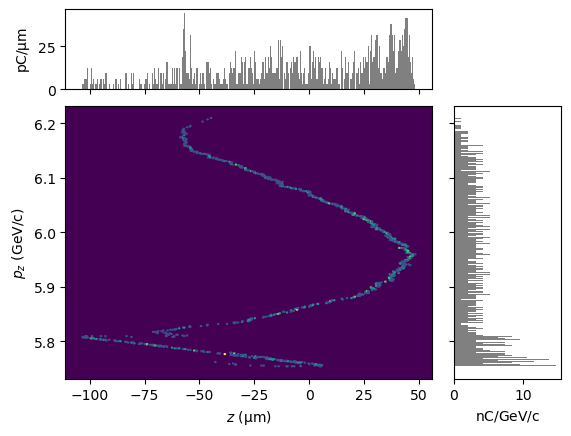




-22 -46
{'linearCompressionTerm': -0.015600000000000027, 'quadraticCompressionTerm': -0.01499999999999957, 'spacingUm': 47.43687253641475, 'driverLength': 2.7255298591482197e-05, 'witnessLength': 2.6777953481495908e-05, 'longestBunchLength': 2.7255298591482197e-05}


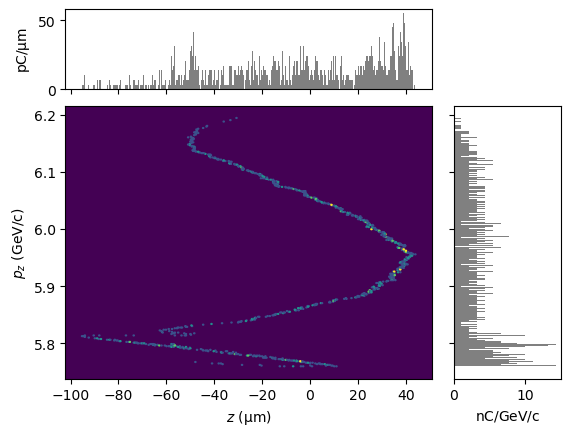




-22 -44
{'linearCompressionTerm': -0.01340000000000004, 'quadraticCompressionTerm': -0.00499999999999956, 'spacingUm': 48.6209407676105, 'driverLength': 1.9981923037628922e-05, 'witnessLength': 2.0678362805556052e-05, 'longestBunchLength': 2.0678362805556052e-05}


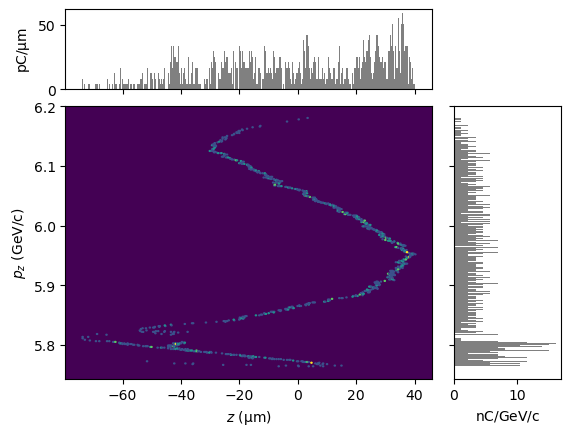




-22 -42



-22 -40



-22 -38



-22 -36



-22 -34



-22 -32



-22 -30



-22 -28



-22 -26



-22 -24



-22 -22



-22 -20



-22 -18



-22 -16



-22 -14



-22 -12



-22 -10



-22 -8



-22 -6



-22 -4



-22 -2



-20 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.15500000000000058, 'spacingUm': 47.89175214903852, 'driverLength': 6.01007870202066e-05, 'witnessLength': 4.2567395068751104e-05, 'longestBunchLength': 6.01007870202066e-05}


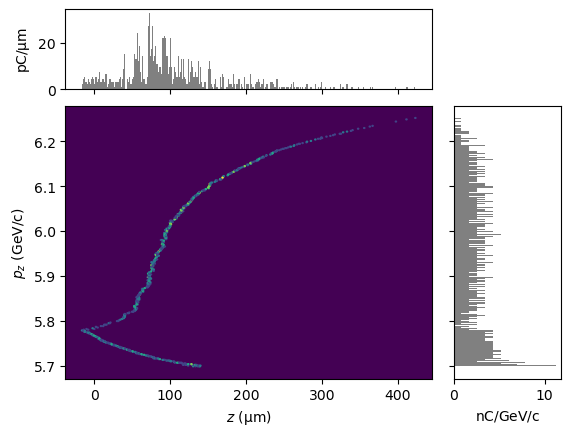




-20 -48
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.0600000000000005, 'spacingUm': 48.67014982548689, 'driverLength': 2.0846763874880376e-05, 'witnessLength': 2.6150988986910543e-05, 'longestBunchLength': 2.6150988986910543e-05}


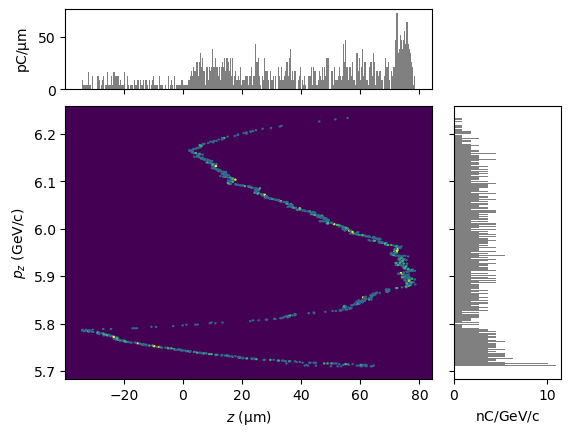




-20 -46
{'linearCompressionTerm': -0.018000000000000013, 'quadraticCompressionTerm': 0.05500000000000049, 'spacingUm': 46.41329244781265, 'driverLength': 2.2031344705677555e-05, 'witnessLength': 2.5634586200550695e-05, 'longestBunchLength': 2.5634586200550695e-05}


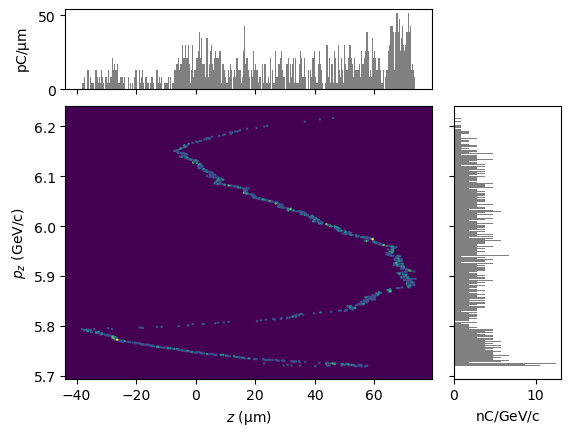




-20 -44
{'linearCompressionTerm': -0.015800000000000026, 'quadraticCompressionTerm': 0.05000000000000049, 'spacingUm': 48.301022607938805, 'driverLength': 2.1613550779740783e-05, 'witnessLength': 2.5181007600883175e-05, 'longestBunchLength': 2.5181007600883175e-05}


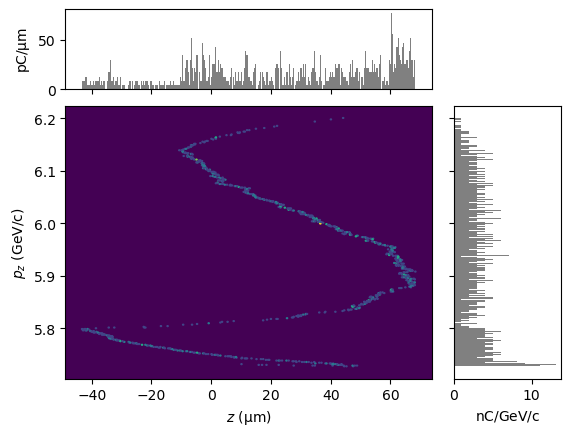




-20 -42
{'linearCompressionTerm': -0.01360000000000004, 'quadraticCompressionTerm': 0.045000000000000484, 'spacingUm': 46.188493083257285, 'driverLength': 2.2153674189469107e-05, 'witnessLength': 2.3123776660711464e-05, 'longestBunchLength': 2.3123776660711464e-05}


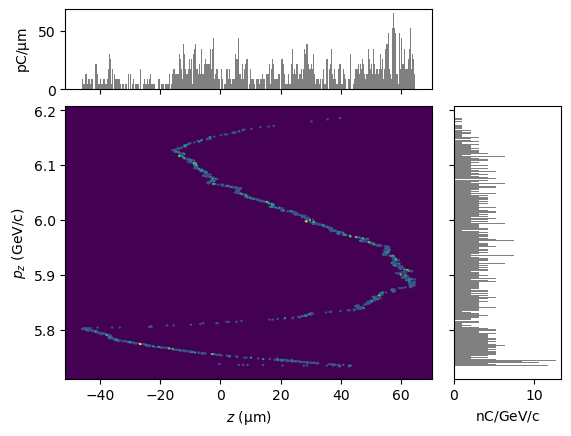




-20 -40
{'linearCompressionTerm': -0.011200000000000054, 'quadraticCompressionTerm': 0.04000000000000048, 'spacingUm': 47.44655561448537, 'driverLength': 2.137930372731145e-05, 'witnessLength': 2.160897637219165e-05, 'longestBunchLength': 2.160897637219165e-05}


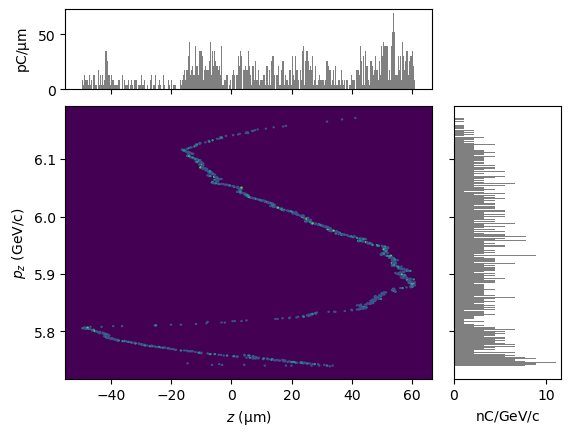




-20 -38
{'linearCompressionTerm': -0.00840000000000007, 'quadraticCompressionTerm': 0.04000000000000048, 'spacingUm': 47.58580483088061, 'driverLength': 1.6377096871478103e-05, 'witnessLength': 1.859592259233232e-05, 'longestBunchLength': 1.859592259233232e-05}


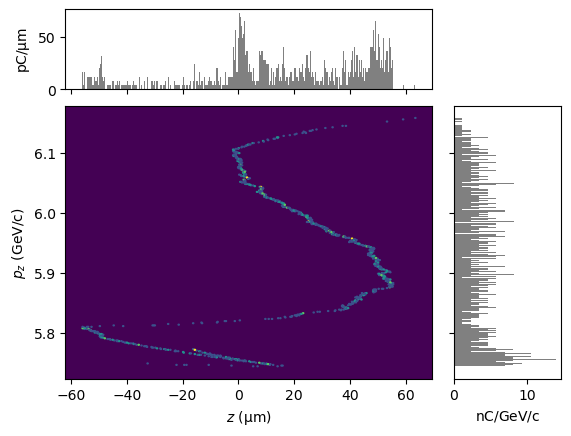




-20 -36
{'linearCompressionTerm': -0.005800000000000086, 'quadraticCompressionTerm': 0.04000000000000048, 'spacingUm': 47.063463193143136, 'driverLength': 1.4226403188432923e-05, 'witnessLength': 1.4554606123532773e-05, 'longestBunchLength': 1.4554606123532773e-05}


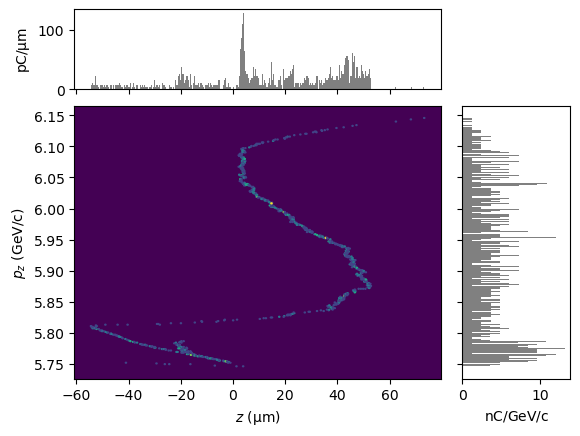




-20 -34
{'linearCompressionTerm': -0.0030000000000001033, 'quadraticCompressionTerm': 0.0650000000000005, 'spacingUm': 45.35559335504963, 'driverLength': 9.333706278246113e-06, 'witnessLength': 9.450952979669733e-06, 'longestBunchLength': 9.450952979669733e-06}


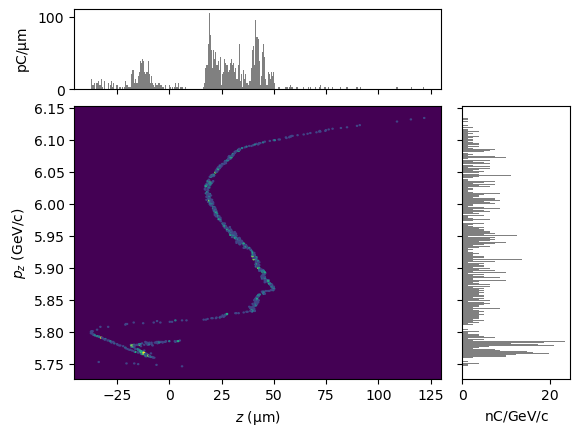




-20 -32
{'linearCompressionTerm': -0.0012000000000001142, 'quadraticCompressionTerm': 0.03000000000000047, 'spacingUm': 32.27790737272669, 'driverLength': 1.2055378421154444e-05, 'witnessLength': 1.1943068496667521e-05, 'longestBunchLength': 1.2055378421154444e-05}


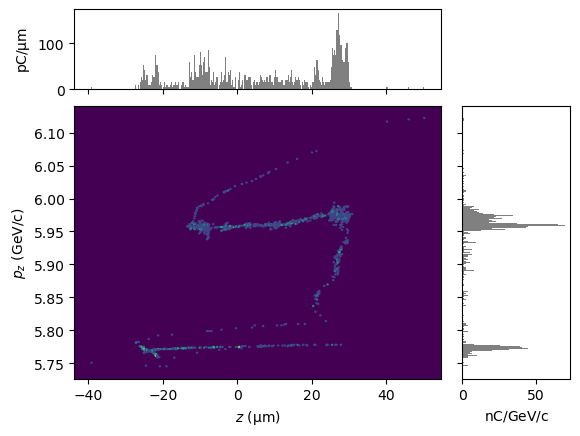




-20 -30



-20 -28



-20 -26



-20 -24



-20 -22



-20 -20



-20 -18



-20 -16



-20 -14



-20 -12



-20 -10



-20 -8



-20 -6



-20 -4



-20 -2



-18 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.21000000000000063, 'spacingUm': 48.031244800725915, 'driverLength': 0.00010430581706892417, 'witnessLength': 5.24656902439441e-05, 'longestBunchLength': 0.00010430581706892417}


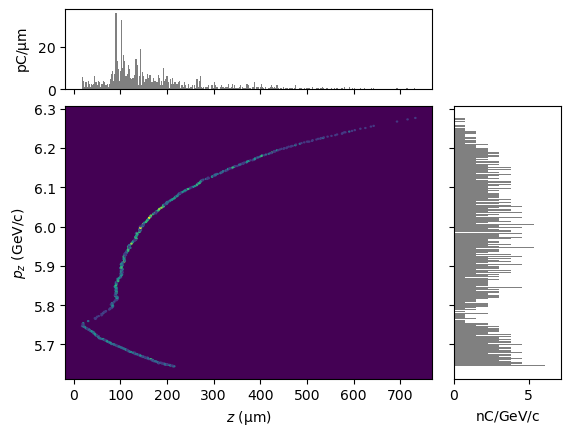




-18 -48
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.14500000000000057, 'spacingUm': 48.60330801323232, 'driverLength': 3.356142197376583e-05, 'witnessLength': 3.493014028728942e-05, 'longestBunchLength': 3.493014028728942e-05}


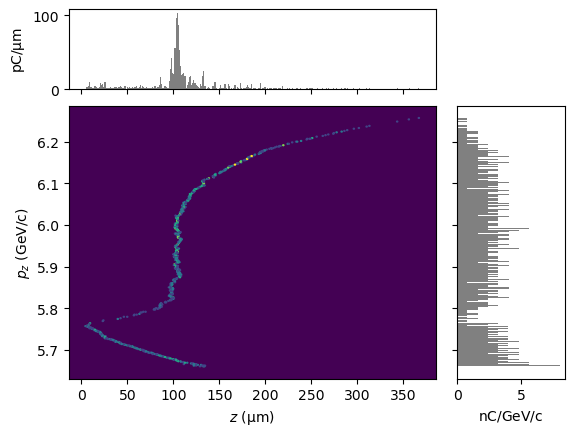




-18 -46
{'linearCompressionTerm': -0.019400000000000004, 'quadraticCompressionTerm': 0.09000000000000052, 'spacingUm': 43.829318505634234, 'driverLength': 2.0718073821295675e-05, 'witnessLength': 2.235063931086689e-05, 'longestBunchLength': 2.235063931086689e-05}


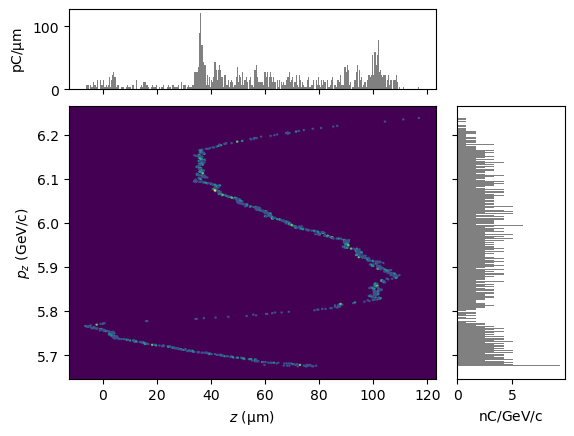




-18 -44
{'linearCompressionTerm': -0.017200000000000017, 'quadraticCompressionTerm': 0.09000000000000052, 'spacingUm': 46.89543245572148, 'driverLength': 1.98546517592516e-05, 'witnessLength': 2.1693825288265408e-05, 'longestBunchLength': 2.1693825288265408e-05}


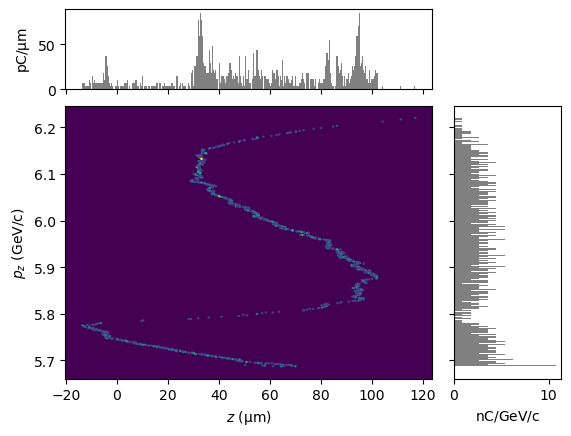




-18 -42
{'linearCompressionTerm': -0.01500000000000003, 'quadraticCompressionTerm': 0.08500000000000052, 'spacingUm': 47.010480183395956, 'driverLength': 2.130615640000769e-05, 'witnessLength': 2.030946527984298e-05, 'longestBunchLength': 2.130615640000769e-05}


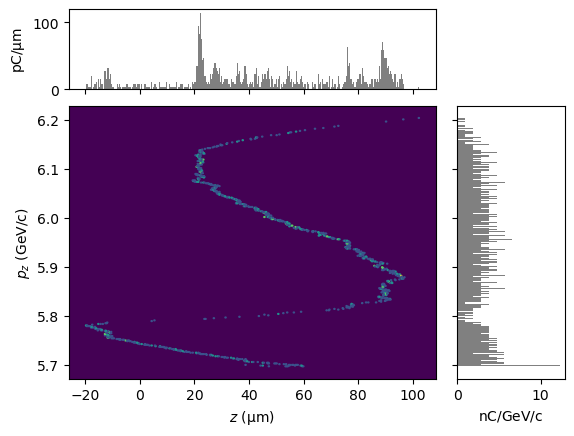




-18 -40
{'linearCompressionTerm': -0.012600000000000045, 'quadraticCompressionTerm': 0.08500000000000052, 'spacingUm': 47.81158651853053, 'driverLength': 2.050900840439581e-05, 'witnessLength': 2.047933350148549e-05, 'longestBunchLength': 2.050900840439581e-05}


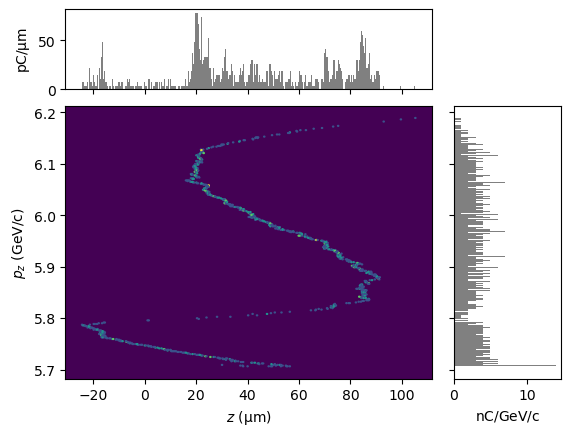




-18 -38
{'linearCompressionTerm': -0.01020000000000006, 'quadraticCompressionTerm': 0.08500000000000052, 'spacingUm': 43.76928801103502, 'driverLength': 2.094495512516169e-05, 'witnessLength': 2.0919718900257074e-05, 'longestBunchLength': 2.094495512516169e-05}


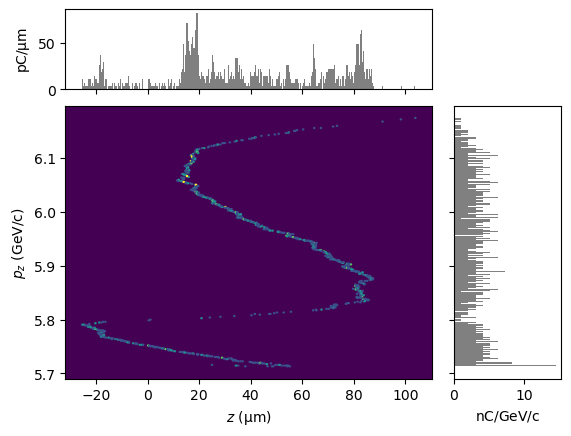




-18 -36
{'linearCompressionTerm': -0.0076000000000000754, 'quadraticCompressionTerm': 0.08500000000000052, 'spacingUm': 43.448447194268944, 'driverLength': 2.0452416972612488e-05, 'witnessLength': 2.0505399418321704e-05, 'longestBunchLength': 2.0505399418321704e-05}


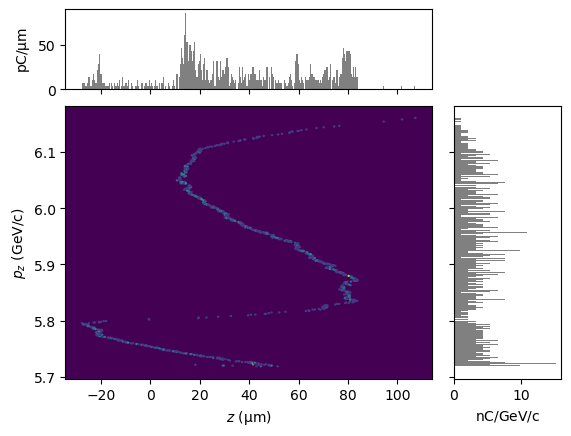




-18 -34
{'linearCompressionTerm': -0.004800000000000092, 'quadraticCompressionTerm': 0.08500000000000052, 'spacingUm': 45.95957180972208, 'driverLength': 1.8884954089668053e-05, 'witnessLength': 1.936653218350194e-05, 'longestBunchLength': 1.936653218350194e-05}


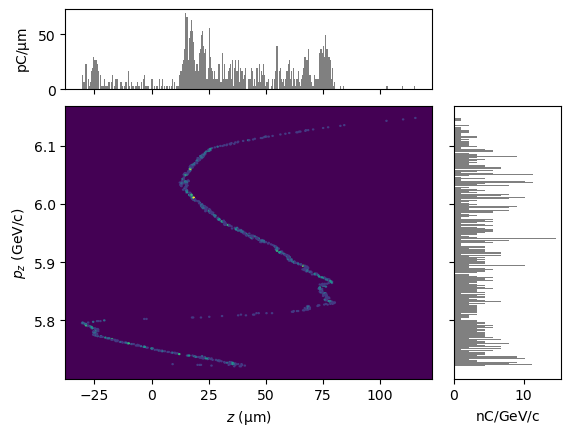




-18 -32
{'linearCompressionTerm': -0.0016000000000001117, 'quadraticCompressionTerm': 0.0650000000000005, 'spacingUm': 49.190800907860925, 'driverLength': 1.1835169511524745e-05, 'witnessLength': 8.833889294510947e-06, 'longestBunchLength': 1.1835169511524745e-05}


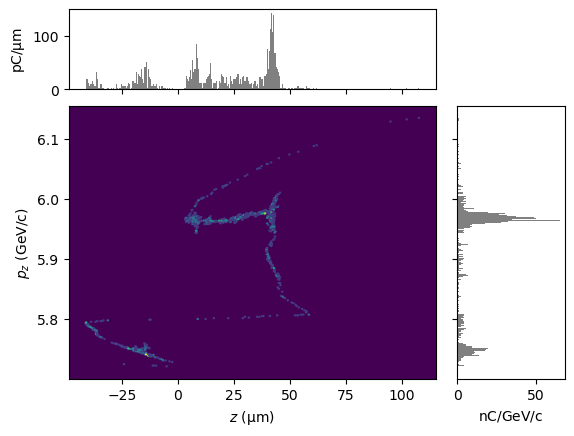




-18 -30



-18 -28



-18 -26



-18 -24



-18 -22



-18 -20



-18 -18



-18 -16



-18 -14



-18 -12



-18 -10



-18 -8



-18 -6



-18 -4



-18 -2



-16 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.23500000000000065, 'spacingUm': 48.53913395890493, 'driverLength': 0.00014226378314942685, 'witnessLength': 6.838371930982695e-05, 'longestBunchLength': 0.00014226378314942685}


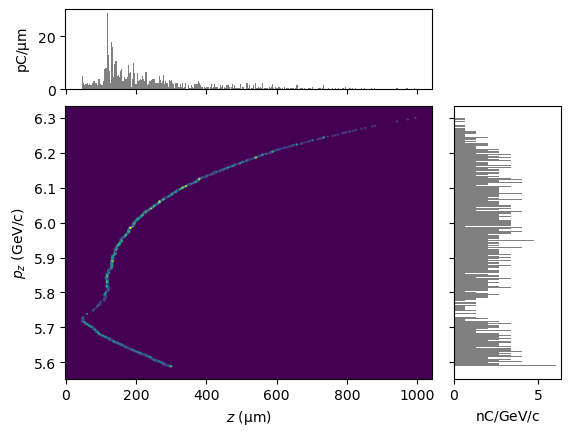




-16 -48
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.1850000000000006, 'spacingUm': 42.76346011587793, 'driverLength': 6.956253527725508e-05, 'witnessLength': 4.59842506547938e-05, 'longestBunchLength': 6.956253527725508e-05}


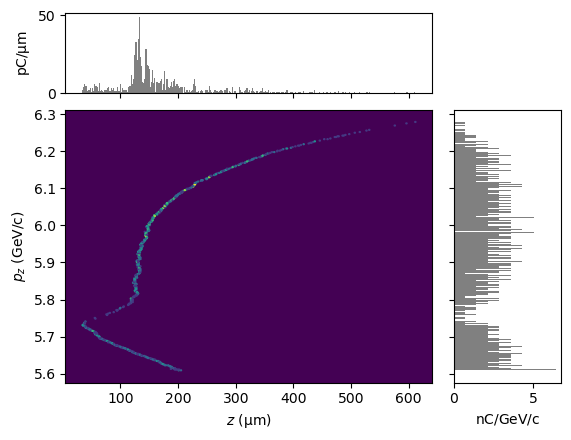




-16 -46
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.12500000000000056, 'spacingUm': 48.50680546890067, 'driverLength': 1.4262767650942634e-05, 'witnessLength': 2.5649863087809983e-05, 'longestBunchLength': 2.5649863087809983e-05}


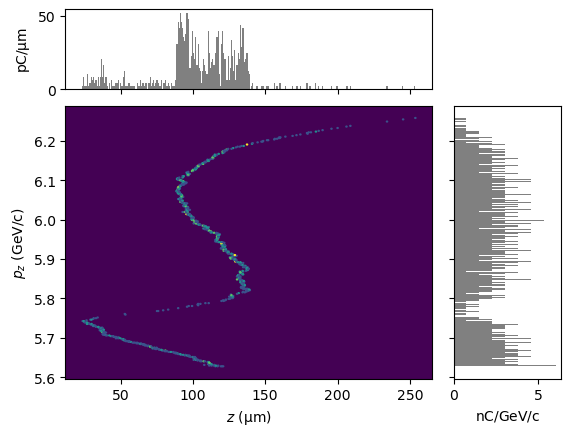




-16 -44
{'linearCompressionTerm': -0.01820000000000001, 'quadraticCompressionTerm': 0.11000000000000054, 'spacingUm': 47.59682327763659, 'driverLength': 2.1058985002666495e-05, 'witnessLength': 1.965931974268604e-05, 'longestBunchLength': 2.1058985002666495e-05}


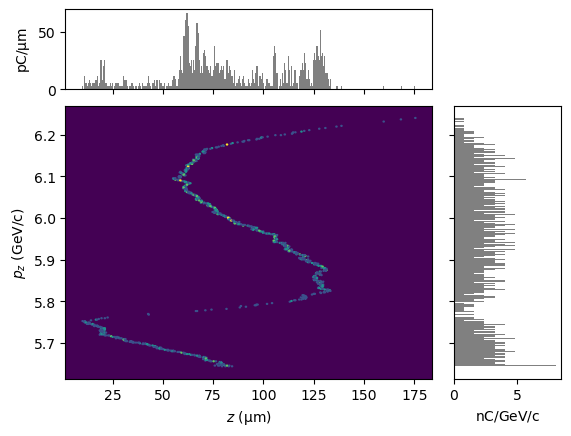




-16 -42
{'linearCompressionTerm': -0.016000000000000025, 'quadraticCompressionTerm': 0.11500000000000055, 'spacingUm': 43.2703436416124, 'driverLength': 2.1150339423875354e-05, 'witnessLength': 2.0767990170300475e-05, 'longestBunchLength': 2.1150339423875354e-05}


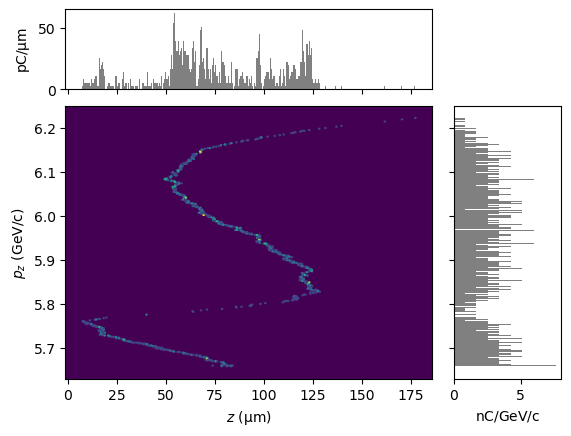




-16 -40
{'linearCompressionTerm': -0.01360000000000004, 'quadraticCompressionTerm': 0.11500000000000055, 'spacingUm': 46.29874145103166, 'driverLength': 2.1084988965065355e-05, 'witnessLength': 1.9822946682810168e-05, 'longestBunchLength': 2.1084988965065355e-05}


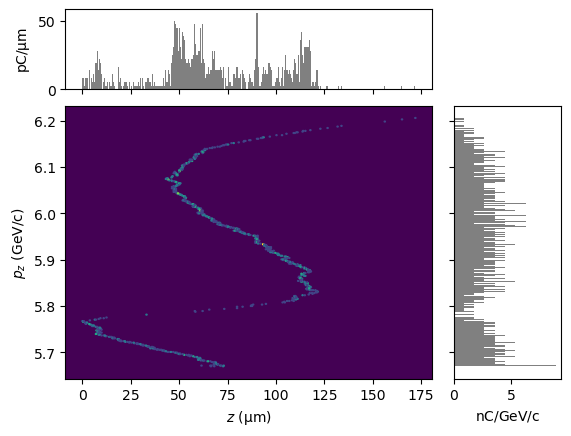




-16 -38
{'linearCompressionTerm': -0.011000000000000055, 'quadraticCompressionTerm': 0.12000000000000055, 'spacingUm': 48.80454384009988, 'driverLength': 1.9689000301087715e-05, 'witnessLength': 2.0310917442341553e-05, 'longestBunchLength': 2.0310917442341553e-05}


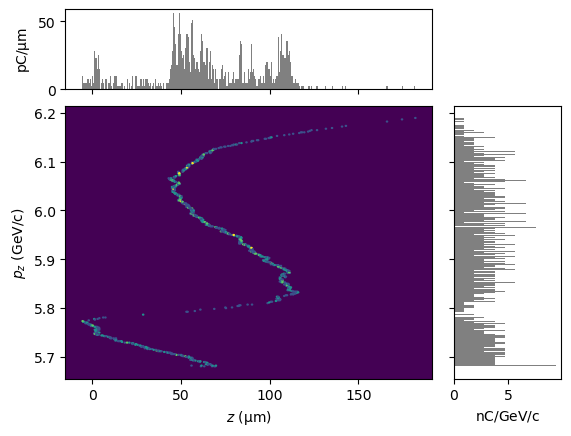




-16 -36
{'linearCompressionTerm': -0.00840000000000007, 'quadraticCompressionTerm': 0.12000000000000055, 'spacingUm': 47.98494232168205, 'driverLength': 2.0049186127936584e-05, 'witnessLength': 1.9508521026842734e-05, 'longestBunchLength': 2.0049186127936584e-05}


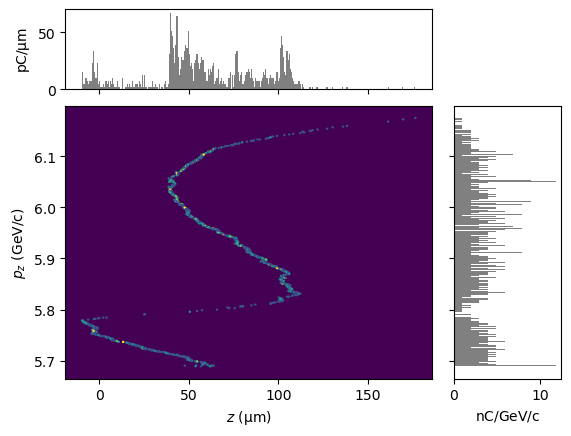




-16 -34
{'linearCompressionTerm': -0.0056000000000000875, 'quadraticCompressionTerm': 0.12500000000000056, 'spacingUm': 48.92087977747194, 'driverLength': 1.9227885439517978e-05, 'witnessLength': 1.982698036400779e-05, 'longestBunchLength': 1.982698036400779e-05}


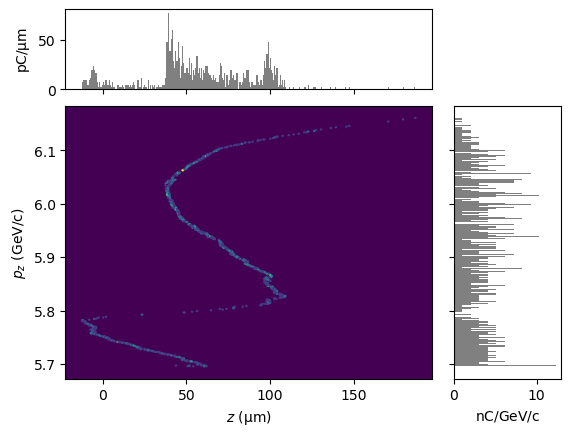




-16 -32
{'linearCompressionTerm': -0.0026000000000001057, 'quadraticCompressionTerm': 0.10500000000000054, 'spacingUm': 48.45328360811867, 'driverLength': 1.5494818092727104e-05, 'witnessLength': 1.4599494944755326e-05, 'longestBunchLength': 1.5494818092727104e-05}


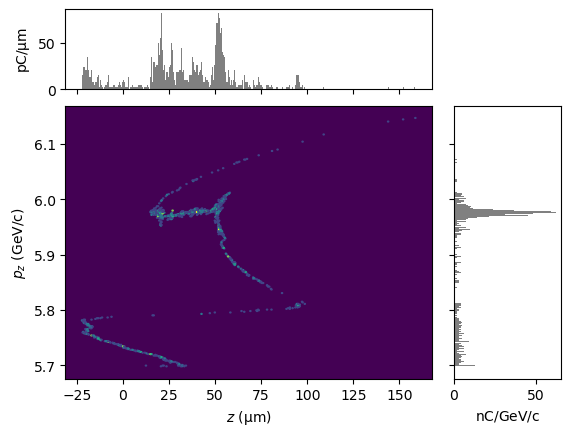




-16 -30
{'linearCompressionTerm': 0.003199999999999859, 'quadraticCompressionTerm': 0.21500000000000064, 'spacingUm': 48.6154098850296, 'driverLength': 3.0918295895826746e-05, 'witnessLength': 3.0207833058609655e-05, 'longestBunchLength': 3.0918295895826746e-05}


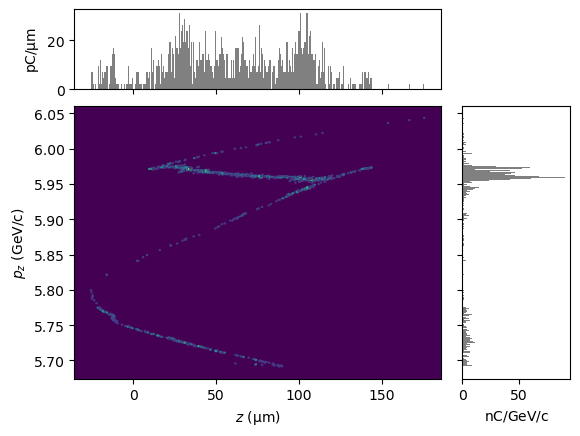




-16 -28
{'linearCompressionTerm': 0.0007999999999998737, 'quadraticCompressionTerm': -0.1749999999999997, 'spacingUm': 49.13613701708029, 'driverLength': 6.967967565565012e-05, 'witnessLength': 1.5364166217079455e-05, 'longestBunchLength': 6.967967565565012e-05}


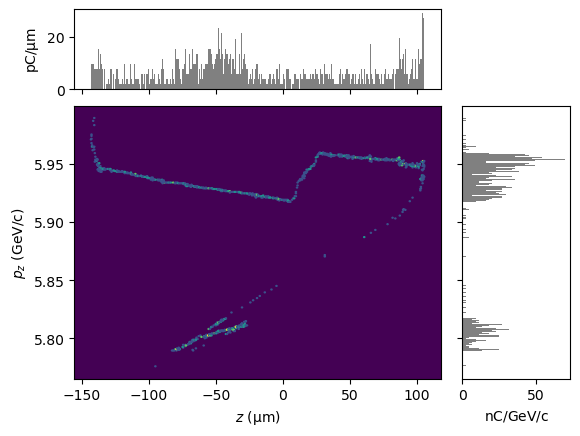




-16 -26
{'linearCompressionTerm': 0.017199999999999774, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 47.96805679344894, 'driverLength': 9.410197430858563e-05, 'witnessLength': 2.423006896414951e-05, 'longestBunchLength': 9.410197430858563e-05}


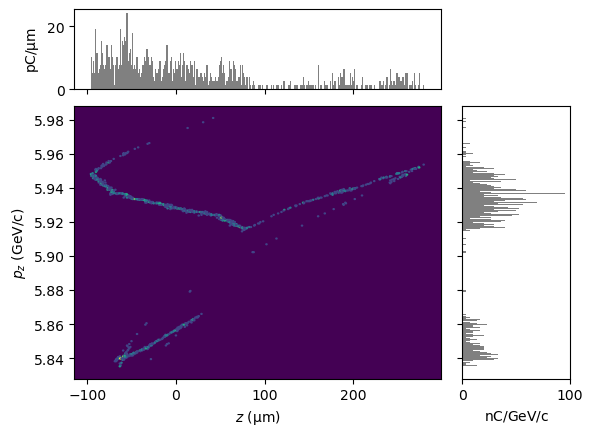




-16 -24



-16 -22



-16 -20



-16 -18



-16 -16



-16 -14



-16 -12



-16 -10



-16 -8



-16 -6



-16 -4



-16 -2



-14 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.24500000000000066, 'spacingUm': 49.491129480357024, 'driverLength': 0.00017865574080030215, 'witnessLength': 8.796679435030072e-05, 'longestBunchLength': 0.00017865574080030215}


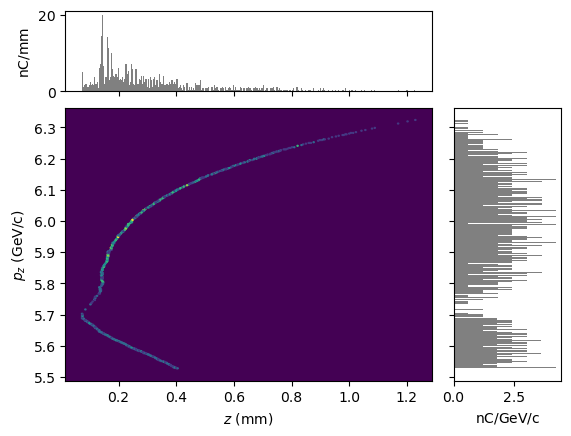




-14 -48
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.20500000000000063, 'spacingUm': 41.859323238800656, 'driverLength': 0.00010219233555823104, 'witnessLength': 6.064517374068753e-05, 'longestBunchLength': 0.00010219233555823104}


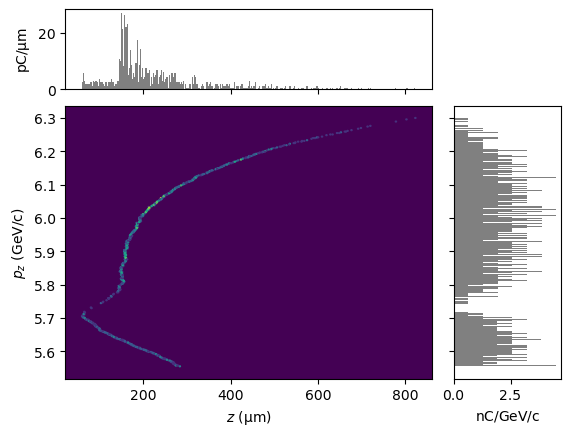




-14 -46
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.15500000000000058, 'spacingUm': 47.88740563445697, 'driverLength': 2.9827772134681758e-05, 'witnessLength': 3.489633335957029e-05, 'longestBunchLength': 3.489633335957029e-05}


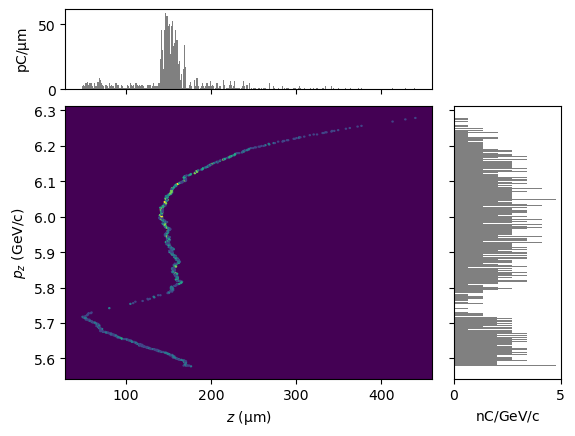




-14 -44
{'linearCompressionTerm': -0.019000000000000006, 'quadraticCompressionTerm': 0.12500000000000056, 'spacingUm': 43.217248624518845, 'driverLength': 2.165963827751306e-05, 'witnessLength': 2.1126154000300736e-05, 'longestBunchLength': 2.165963827751306e-05}


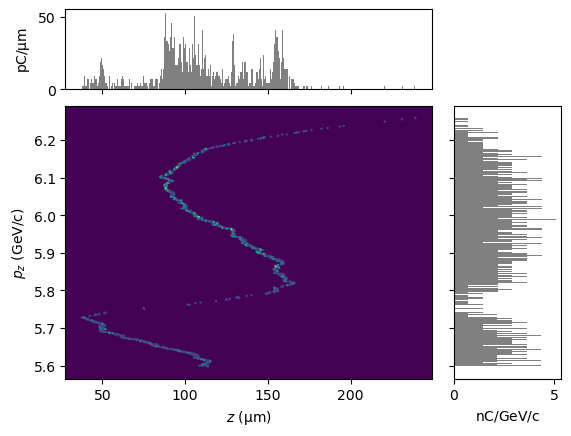




-14 -42
{'linearCompressionTerm': -0.01680000000000002, 'quadraticCompressionTerm': 0.13000000000000056, 'spacingUm': 40.07322224147245, 'driverLength': 2.2050328692484953e-05, 'witnessLength': 2.114660904129725e-05, 'longestBunchLength': 2.2050328692484953e-05}


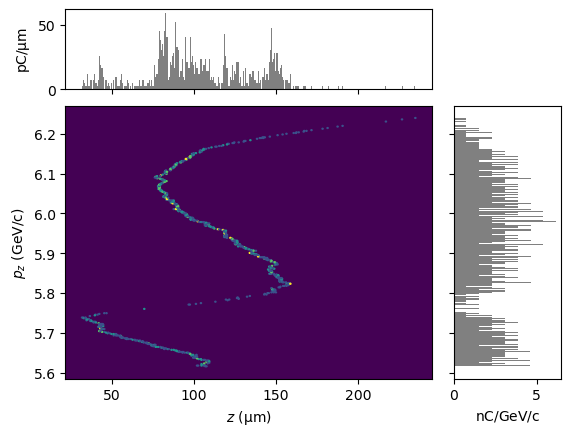




-14 -40
{'linearCompressionTerm': -0.014400000000000034, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 41.2797497340389, 'driverLength': 2.1556722075715818e-05, 'witnessLength': 2.0991357225231156e-05, 'longestBunchLength': 2.1556722075715818e-05}


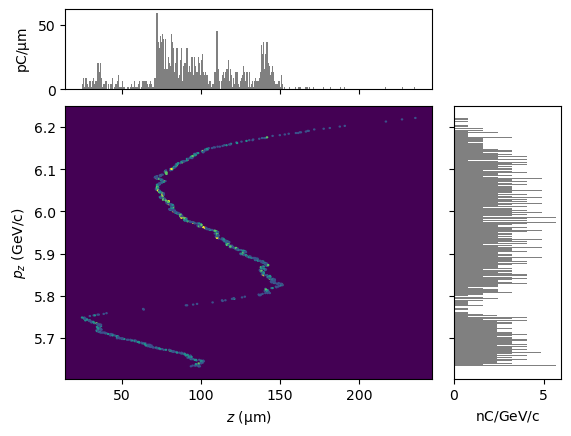




-14 -38
{'linearCompressionTerm': -0.01180000000000005, 'quadraticCompressionTerm': 0.14000000000000057, 'spacingUm': 46.88764925632821, 'driverLength': 2.061235675645443e-05, 'witnessLength': 2.0802733189523805e-05, 'longestBunchLength': 2.0802733189523805e-05}


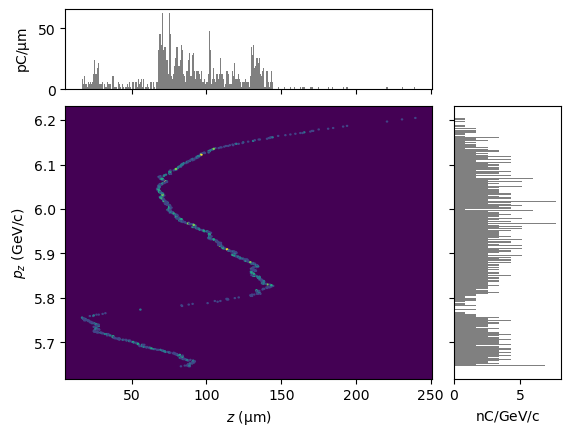




-14 -36
{'linearCompressionTerm': -0.009200000000000066, 'quadraticCompressionTerm': 0.14500000000000057, 'spacingUm': 45.24027551040676, 'driverLength': 2.1316558318024907e-05, 'witnessLength': 2.1212247506027473e-05, 'longestBunchLength': 2.1316558318024907e-05}


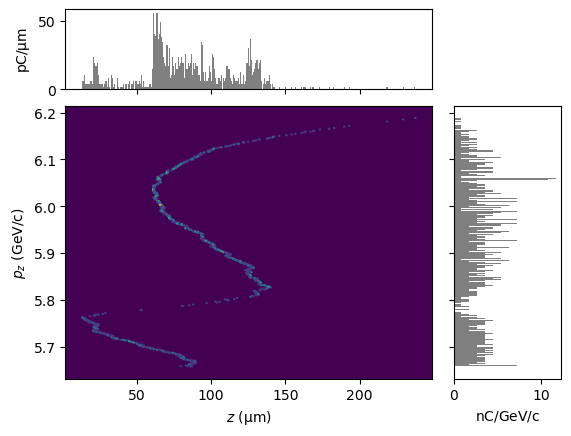




-14 -34
{'linearCompressionTerm': -0.006400000000000083, 'quadraticCompressionTerm': 0.15000000000000058, 'spacingUm': 46.01923281059867, 'driverLength': 2.161783467371881e-05, 'witnessLength': 2.1418572610869962e-05, 'longestBunchLength': 2.161783467371881e-05}


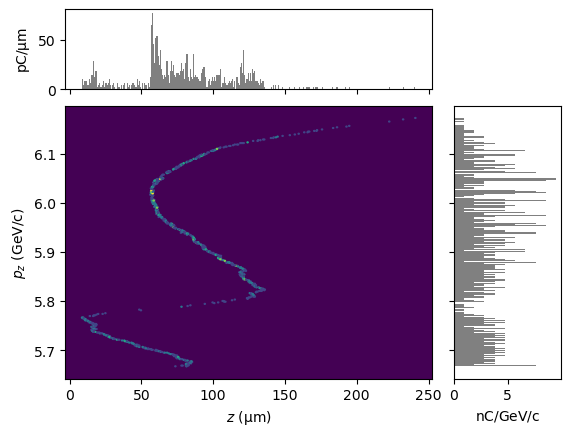




-14 -32
{'linearCompressionTerm': -0.0030000000000001033, 'quadraticCompressionTerm': 0.14500000000000057, 'spacingUm': 49.317305918053506, 'driverLength': 1.867638507298219e-05, 'witnessLength': 1.6965192823406714e-05, 'longestBunchLength': 1.867638507298219e-05}


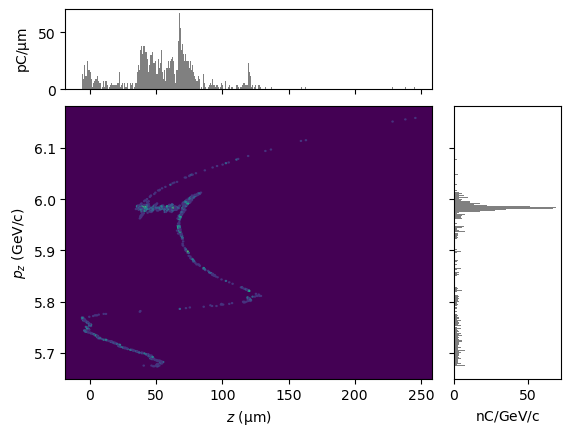




-14 -30
{'linearCompressionTerm': 0.0021999999999998653, 'quadraticCompressionTerm': 0.22000000000000064, 'spacingUm': 48.67181686079749, 'driverLength': 2.912972399317017e-05, 'witnessLength': 2.8116363274414266e-05, 'longestBunchLength': 2.912972399317017e-05}


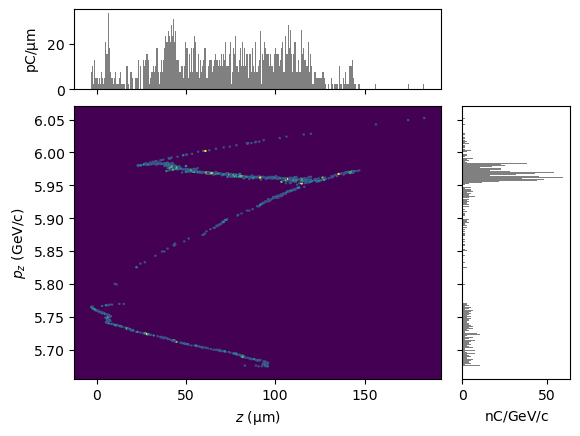




-14 -28
{'linearCompressionTerm': 0.007599999999999833, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 44.90905824285573, 'driverLength': 6.762376699091501e-05, 'witnessLength': 5.270864004823359e-05, 'longestBunchLength': 6.762376699091501e-05}


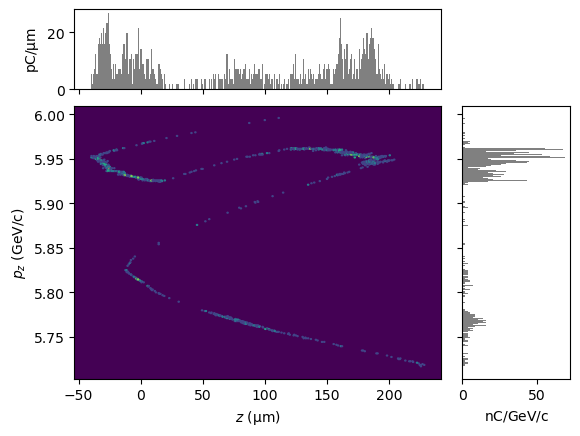




-14 -26
{'linearCompressionTerm': 0.01459999999999979, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 49.78946075789081, 'driverLength': 9.78440196770326e-05, 'witnessLength': 9.471785284882112e-06, 'longestBunchLength': 9.78440196770326e-05}


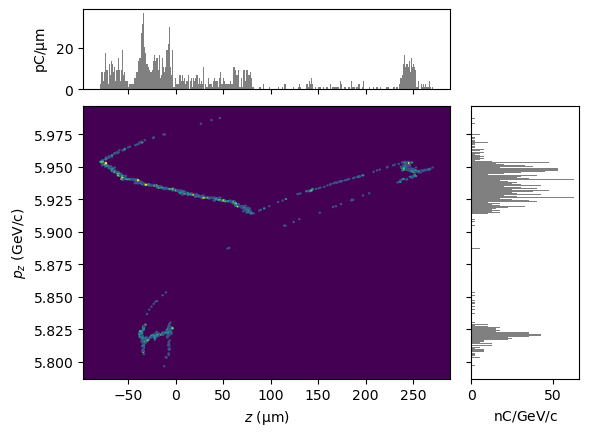




-14 -24



-14 -22



-14 -20



-14 -18



-14 -16



-14 -14



-14 -12



-14 -10



-14 -8



-14 -6



-14 -4



-14 -2



-12 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.25000000000000067, 'spacingUm': 43.74964126055967, 'driverLength': 0.00021488536929011585, 'witnessLength': 0.00011335402022468958, 'longestBunchLength': 0.00021488536929011585}


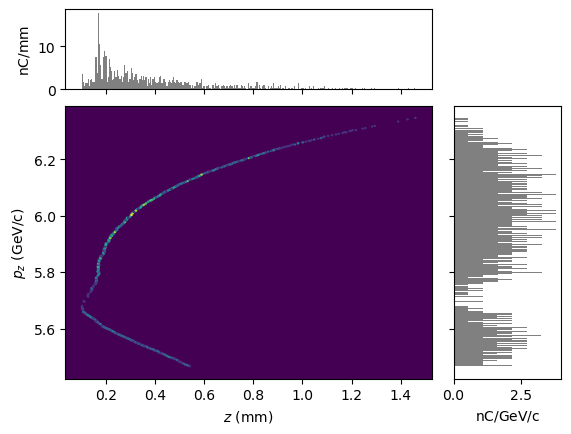




-12 -48
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.21500000000000064, 'spacingUm': 41.257176358904424, 'driverLength': 0.00013170575043411115, 'witnessLength': 7.750963777388124e-05, 'longestBunchLength': 0.00013170575043411115}


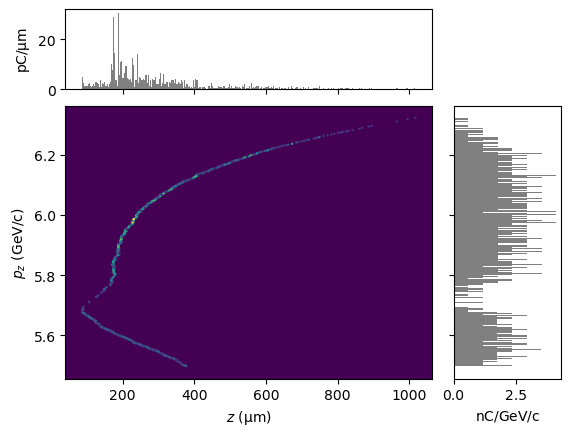




-12 -46
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.1700000000000006, 'spacingUm': 44.26835788296616, 'driverLength': 5.049244088505118e-05, 'witnessLength': 4.5366153249154915e-05, 'longestBunchLength': 5.049244088505118e-05}


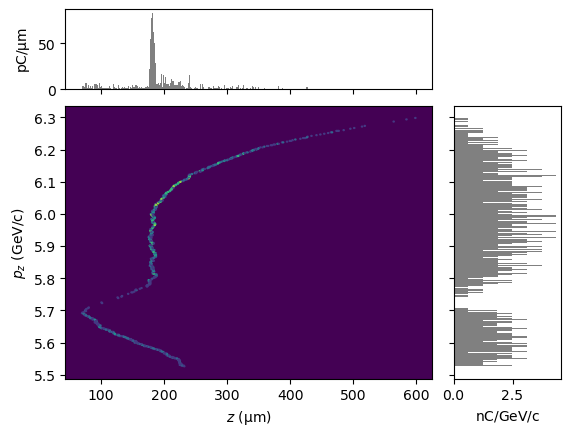




-12 -44
{'linearCompressionTerm': -0.019600000000000003, 'quadraticCompressionTerm': 0.13000000000000056, 'spacingUm': 45.188120353902285, 'driverLength': 2.198540262453596e-05, 'witnessLength': 2.1890268393034457e-05, 'longestBunchLength': 2.198540262453596e-05}


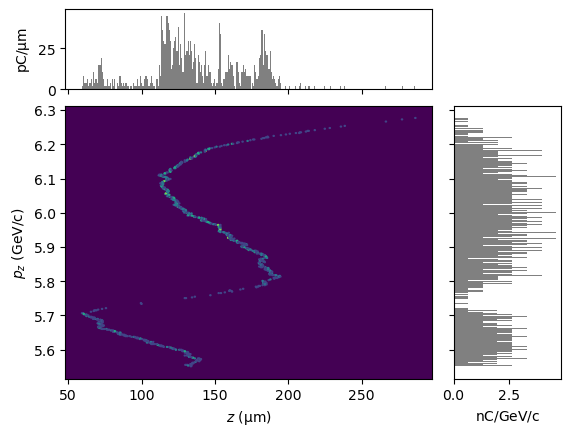




-12 -42
{'linearCompressionTerm': -0.017400000000000016, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 45.62670952882659, 'driverLength': 2.2699540816602815e-05, 'witnessLength': 2.0857075754607235e-05, 'longestBunchLength': 2.2699540816602815e-05}


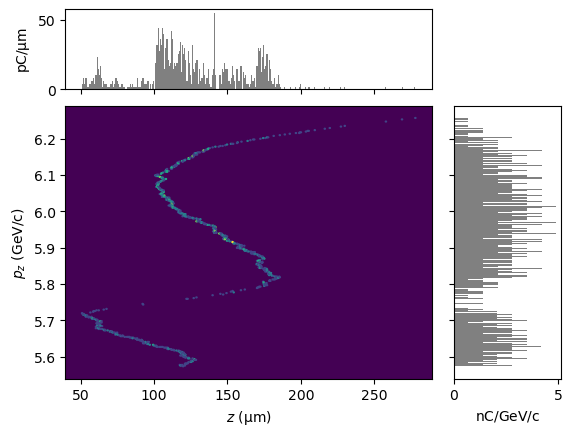




-12 -40
{'linearCompressionTerm': -0.01500000000000003, 'quadraticCompressionTerm': 0.14500000000000057, 'spacingUm': 45.246666291771604, 'driverLength': 2.197439081850148e-05, 'witnessLength': 2.2342956841321982e-05, 'longestBunchLength': 2.2342956841321982e-05}


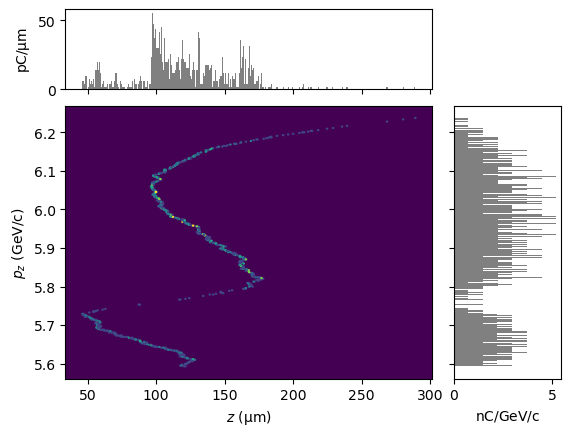




-12 -38
{'linearCompressionTerm': -0.012400000000000046, 'quadraticCompressionTerm': 0.15500000000000058, 'spacingUm': 43.24119151375905, 'driverLength': 2.105609562278718e-05, 'witnessLength': 2.321586773694441e-05, 'longestBunchLength': 2.321586773694441e-05}


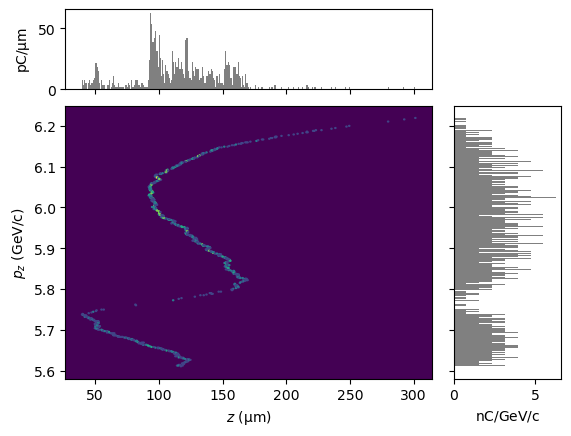




-12 -36
{'linearCompressionTerm': -0.009800000000000062, 'quadraticCompressionTerm': 0.15500000000000058, 'spacingUm': 47.50603039791754, 'driverLength': 2.239011710820945e-05, 'witnessLength': 2.096824893186707e-05, 'longestBunchLength': 2.239011710820945e-05}


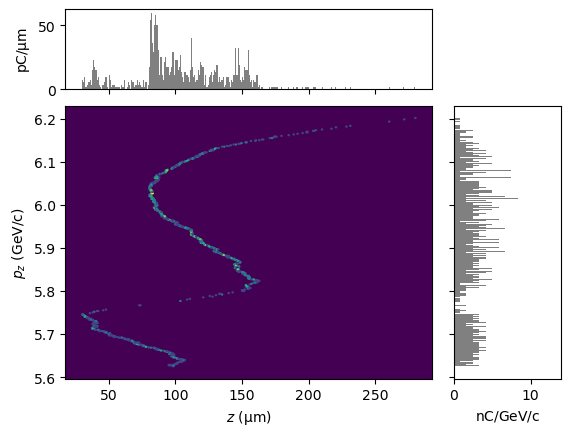




-12 -34
{'linearCompressionTerm': -0.007000000000000079, 'quadraticCompressionTerm': 0.1650000000000006, 'spacingUm': 43.46470245519086, 'driverLength': 2.290790700729819e-05, 'witnessLength': 2.2468149895791704e-05, 'longestBunchLength': 2.290790700729819e-05}


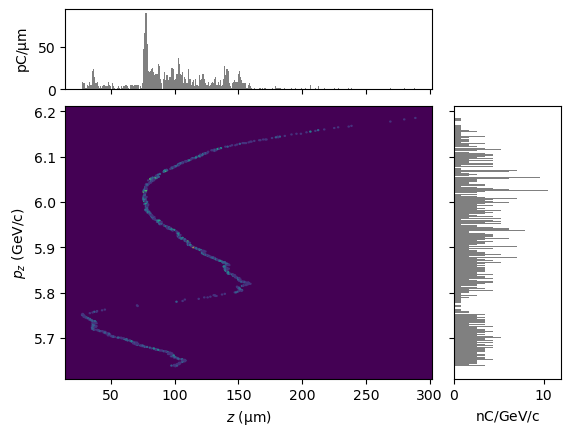




-12 -32
{'linearCompressionTerm': -0.0030000000000001033, 'quadraticCompressionTerm': 0.1850000000000006, 'spacingUm': 48.929989682544864, 'driverLength': 2.108686970081592e-05, 'witnessLength': 2.179244113655676e-05, 'longestBunchLength': 2.179244113655676e-05}


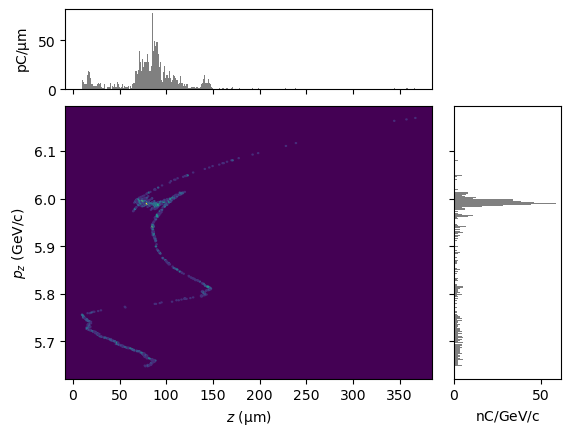




-12 -30
{'linearCompressionTerm': 0.0015999999999998689, 'quadraticCompressionTerm': 0.22500000000000064, 'spacingUm': 48.901678992458585, 'driverLength': 2.8139467243149746e-05, 'witnessLength': 2.6887274568420668e-05, 'longestBunchLength': 2.8139467243149746e-05}


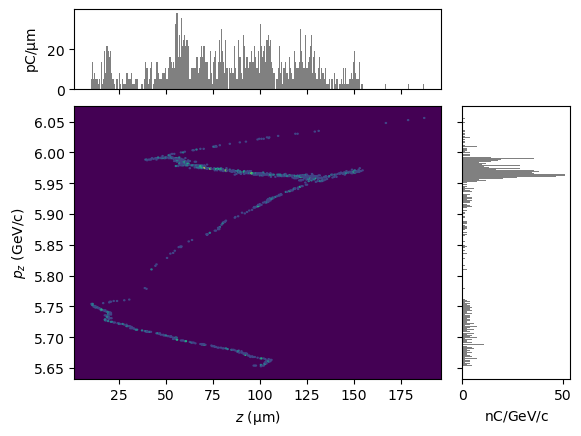




-12 -28
{'linearCompressionTerm': 0.006199999999999841, 'quadraticCompressionTerm': 0.3950000000000008, 'spacingUm': 45.06717957856093, 'driverLength': 6.57387872648914e-05, 'witnessLength': 6.563947804430534e-05, 'longestBunchLength': 6.57387872648914e-05}


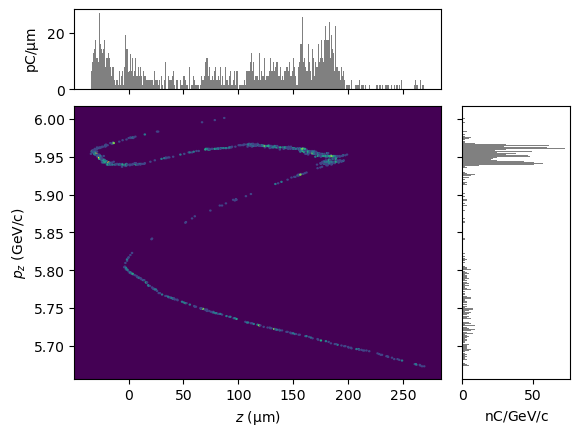




-12 -26
{'linearCompressionTerm': 0.013399999999999797, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 45.825559729171424, 'driverLength': 9.235032441207707e-05, 'witnessLength': 1.0172315591200214e-05, 'longestBunchLength': 9.235032441207707e-05}


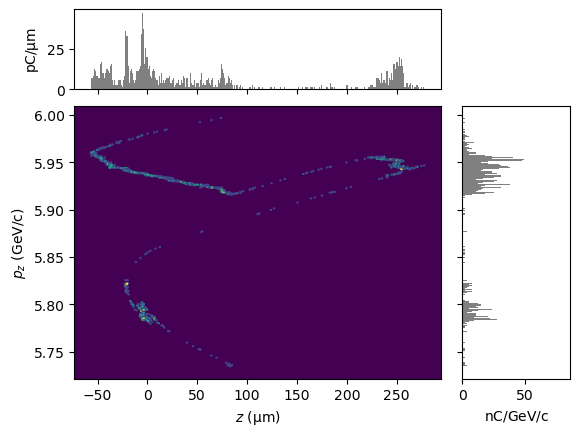




-12 -24
{'linearCompressionTerm': 0.01979999999999976, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 32.02916459473254, 'driverLength': 0.00010533817129904667, 'witnessLength': 1.7429473816950256e-05, 'longestBunchLength': 0.00010533817129904667}


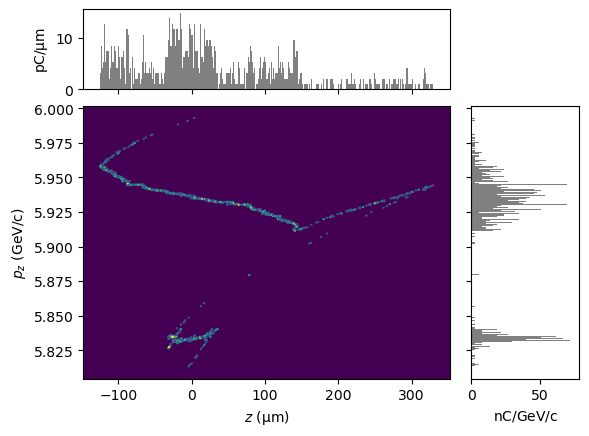




-12 -22



-12 -20



-12 -18



-12 -16



-12 -14



-12 -12



-12 -10



-12 -8



-12 -6



-12 -4



-12 -2



-10 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.25000000000000067, 'spacingUm': 38.12105381635796, 'driverLength': 0.00025001982163969663, 'witnessLength': 0.00014155633596584118, 'longestBunchLength': 0.00025001982163969663}


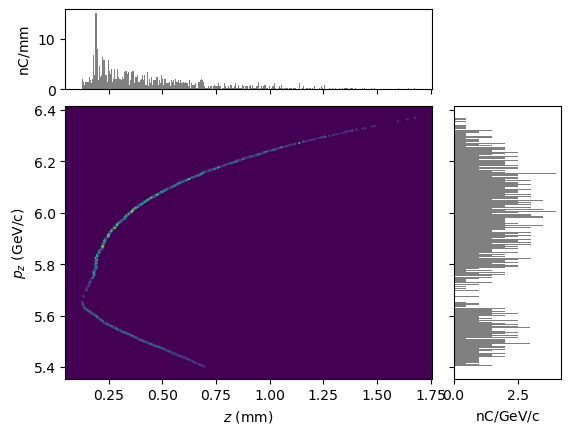




-10 -48
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.22000000000000064, 'spacingUm': 38.54444866816908, 'driverLength': 0.0001606040096832068, 'witnessLength': 9.702337602349032e-05, 'longestBunchLength': 0.0001606040096832068}


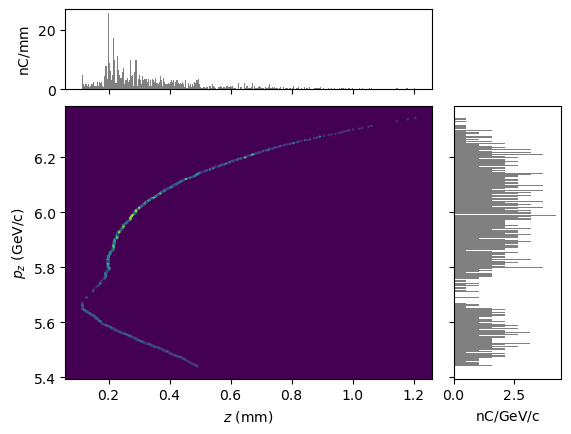




-10 -46
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.1800000000000006, 'spacingUm': 42.90449193456041, 'driverLength': 7.435323815206338e-05, 'witnessLength': 5.7948677831987453e-05, 'longestBunchLength': 7.435323815206338e-05}


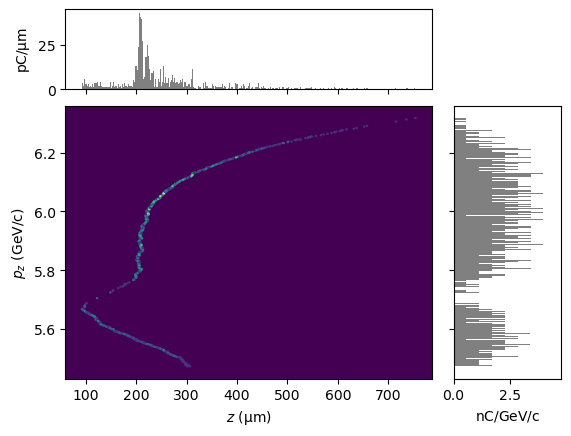




-10 -44
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.14000000000000057, 'spacingUm': 41.165643637401665, 'driverLength': 1.9616931673296915e-05, 'witnessLength': 2.8519685448903636e-05, 'longestBunchLength': 2.8519685448903636e-05}


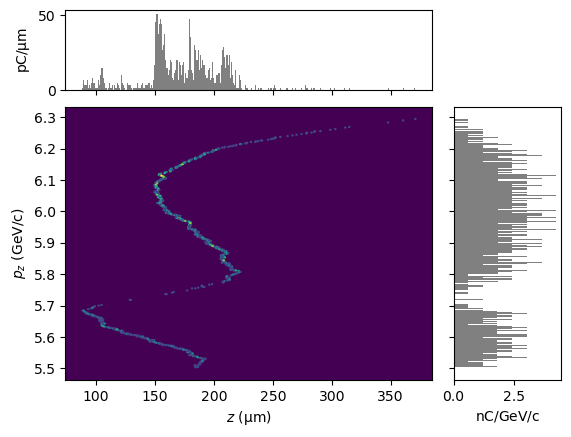




-10 -42
{'linearCompressionTerm': -0.018000000000000013, 'quadraticCompressionTerm': 0.14000000000000057, 'spacingUm': 40.19221080042105, 'driverLength': 2.365232948944513e-05, 'witnessLength': 2.3516381913389656e-05, 'longestBunchLength': 2.365232948944513e-05}


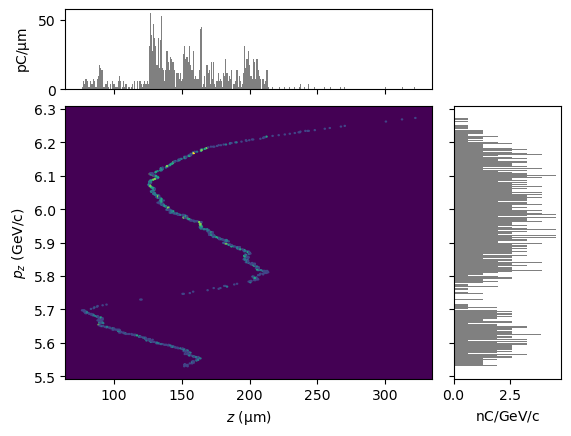




-10 -40
{'linearCompressionTerm': -0.015600000000000027, 'quadraticCompressionTerm': 0.14500000000000057, 'spacingUm': 47.733183807411535, 'driverLength': 2.3803837903080462e-05, 'witnessLength': 2.1406933156692788e-05, 'longestBunchLength': 2.3803837903080462e-05}


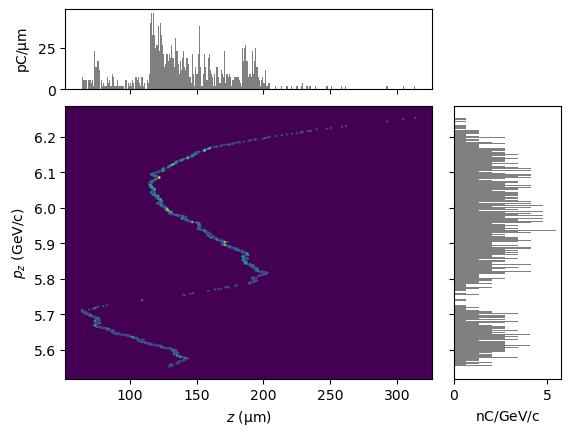




-10 -38
{'linearCompressionTerm': -0.013000000000000043, 'quadraticCompressionTerm': 0.15500000000000058, 'spacingUm': 47.23008971379791, 'driverLength': 2.2766351797680514e-05, 'witnessLength': 2.194152407969049e-05, 'longestBunchLength': 2.2766351797680514e-05}


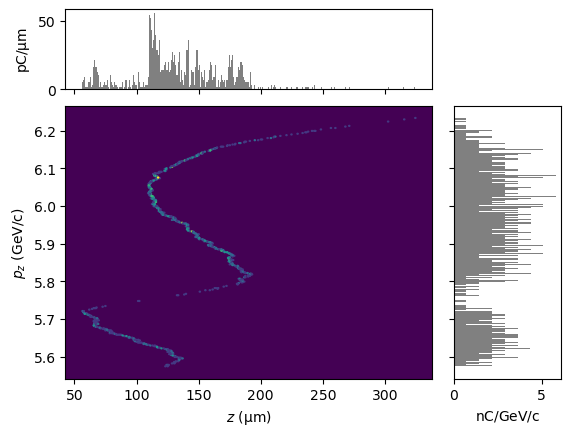




-10 -36
{'linearCompressionTerm': -0.010400000000000059, 'quadraticCompressionTerm': 0.1650000000000006, 'spacingUm': 39.634007425637314, 'driverLength': 2.3781700234026197e-05, 'witnessLength': 2.331365169817514e-05, 'longestBunchLength': 2.3781700234026197e-05}


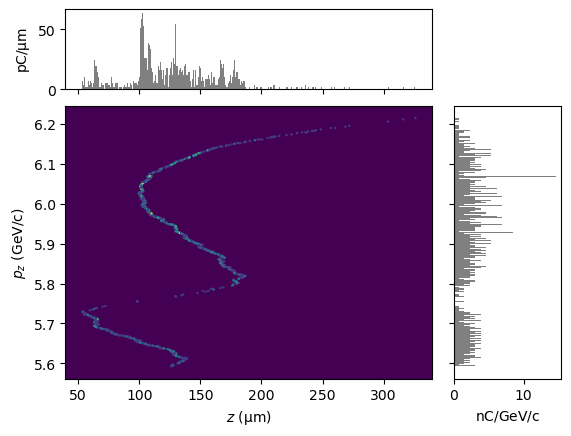




-10 -34
{'linearCompressionTerm': -0.007400000000000077, 'quadraticCompressionTerm': 0.1750000000000006, 'spacingUm': 47.26767318472214, 'driverLength': 2.3027983431536196e-05, 'witnessLength': 2.3126724728155192e-05, 'longestBunchLength': 2.3126724728155192e-05}


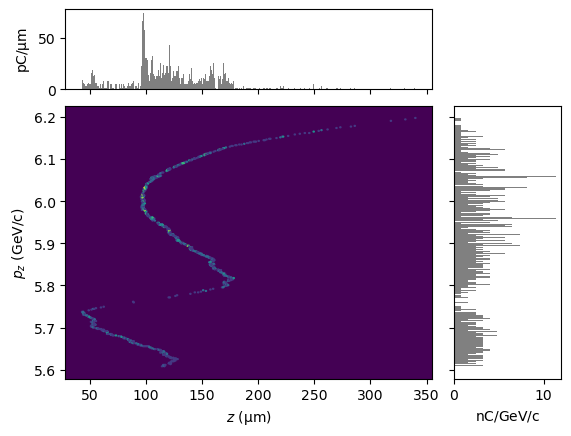




-10 -32
{'linearCompressionTerm': -0.0036000000000000996, 'quadraticCompressionTerm': 0.1900000000000006, 'spacingUm': 47.78103353615804, 'driverLength': 2.3429600454034827e-05, 'witnessLength': 2.1711111299469813e-05, 'longestBunchLength': 2.3429600454034827e-05}


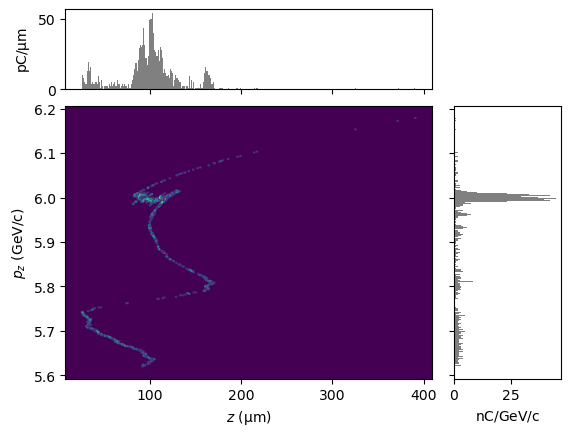




-10 -30
{'linearCompressionTerm': 0.0009999999999998725, 'quadraticCompressionTerm': 0.22500000000000064, 'spacingUm': 47.67159474425389, 'driverLength': 2.675520151391695e-05, 'witnessLength': 2.5558842623046558e-05, 'longestBunchLength': 2.675520151391695e-05}


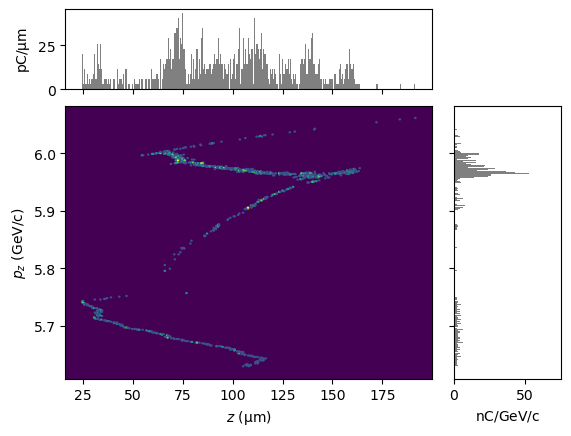




-10 -28
{'linearCompressionTerm': 0.004999999999999848, 'quadraticCompressionTerm': 0.3050000000000007, 'spacingUm': 48.97424010162815, 'driverLength': 6.327837053535372e-05, 'witnessLength': 6.199276329703267e-05, 'longestBunchLength': 6.327837053535372e-05}


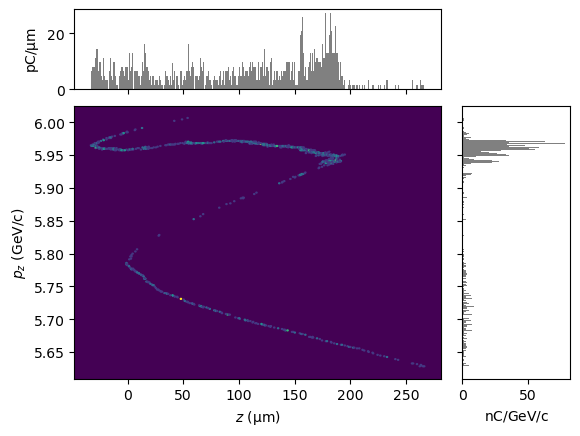




-10 -26
{'linearCompressionTerm': 0.0129999999999998, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 46.0180966072806, 'driverLength': 8.772796756913866e-05, 'witnessLength': 4.000313468042586e-05, 'longestBunchLength': 8.772796756913866e-05}


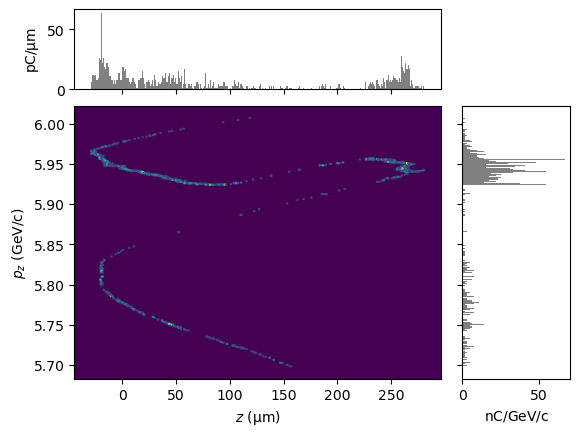




-10 -24
{'linearCompressionTerm': 0.018599999999999766, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 48.29844203682657, 'driverLength': 0.00011223490723741593, 'witnessLength': 9.719747389539478e-06, 'longestBunchLength': 0.00011223490723741593}


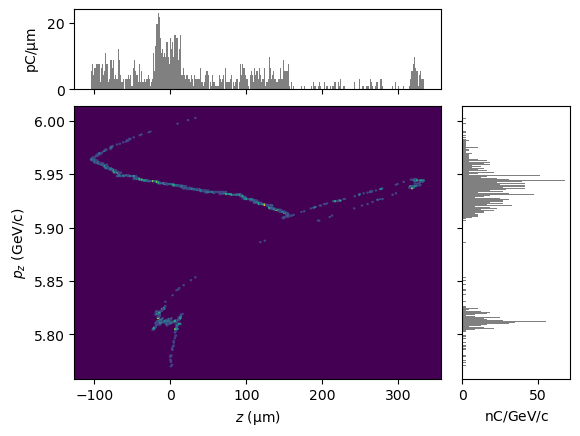




-10 -22



-10 -20



-10 -18



-10 -16



-10 -14



-10 -12



-10 -10



-10 -8



-10 -6



-10 -4



-10 -2



-8 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.24500000000000066, 'spacingUm': 43.46288521358166, 'driverLength': 0.0002826866740993843, 'witnessLength': 0.0001679358555851072, 'longestBunchLength': 0.0002826866740993843}


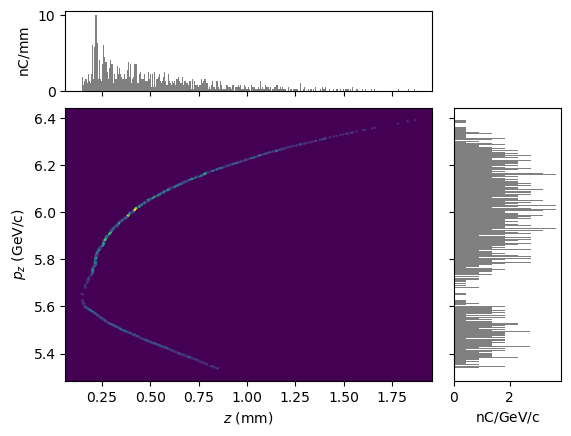




-8 -48
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.22000000000000064, 'spacingUm': 41.825648435228906, 'driverLength': 0.00018797235544494782, 'witnessLength': 0.00011649058760285472, 'longestBunchLength': 0.00018797235544494782}


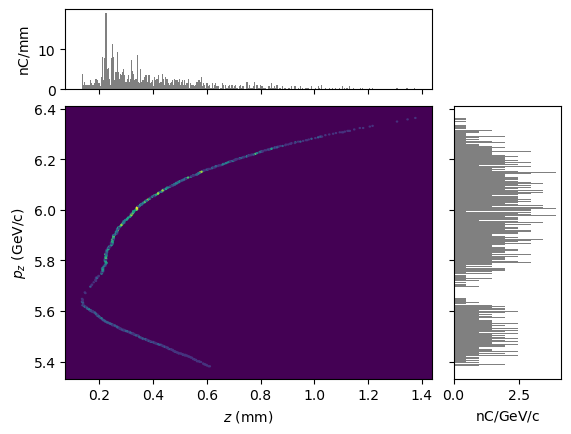




-8 -46
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.1850000000000006, 'spacingUm': 47.2497128515204, 'driverLength': 9.701173909269161e-05, 'witnessLength': 7.076134291109181e-05, 'longestBunchLength': 9.701173909269161e-05}


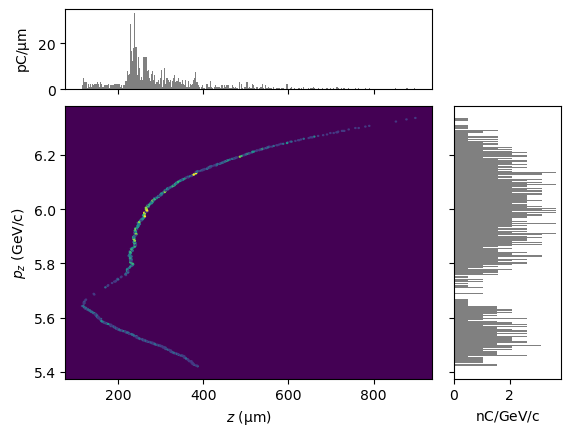




-8 -44
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.15000000000000058, 'spacingUm': 44.34499446804161, 'driverLength': 2.341222474057529e-05, 'witnessLength': 3.742867096876495e-05, 'longestBunchLength': 3.742867096876495e-05}


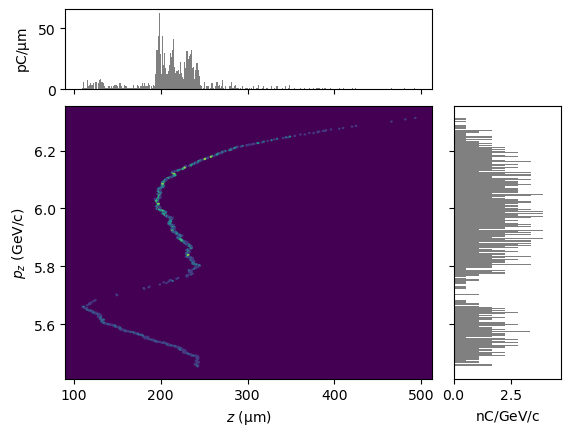




-8 -42
{'linearCompressionTerm': -0.01860000000000001, 'quadraticCompressionTerm': 0.14000000000000057, 'spacingUm': 33.70816677794521, 'driverLength': 2.6209313479089593e-05, 'witnessLength': 2.5503167229575832e-05, 'longestBunchLength': 2.6209313479089593e-05}


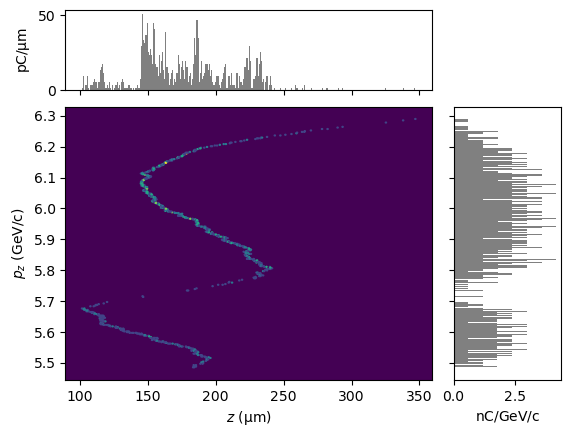




-8 -40
{'linearCompressionTerm': -0.016000000000000025, 'quadraticCompressionTerm': 0.15000000000000058, 'spacingUm': 46.879109343491315, 'driverLength': 2.307297259397223e-05, 'witnessLength': 2.4119825901440124e-05, 'longestBunchLength': 2.4119825901440124e-05}


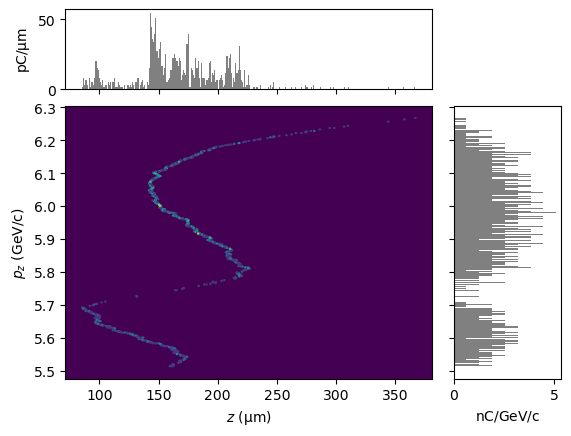




-8 -38
{'linearCompressionTerm': -0.01340000000000004, 'quadraticCompressionTerm': 0.1600000000000006, 'spacingUm': 48.65496607427426, 'driverLength': 2.247862187569225e-05, 'witnessLength': 2.37416256358936e-05, 'longestBunchLength': 2.37416256358936e-05}


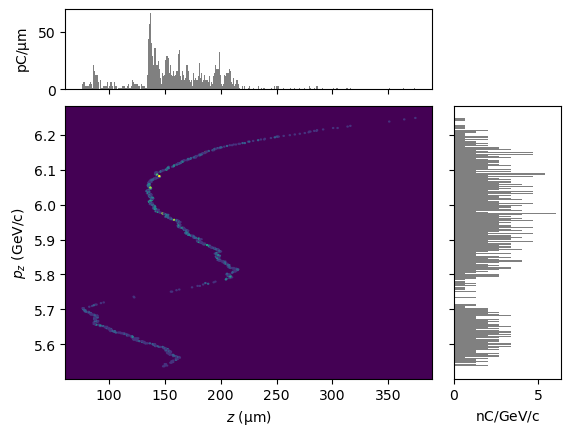




-8 -36
{'linearCompressionTerm': -0.010800000000000056, 'quadraticCompressionTerm': 0.1650000000000006, 'spacingUm': 48.88005640188, 'driverLength': 2.4060788249007756e-05, 'witnessLength': 2.170911499566898e-05, 'longestBunchLength': 2.4060788249007756e-05}


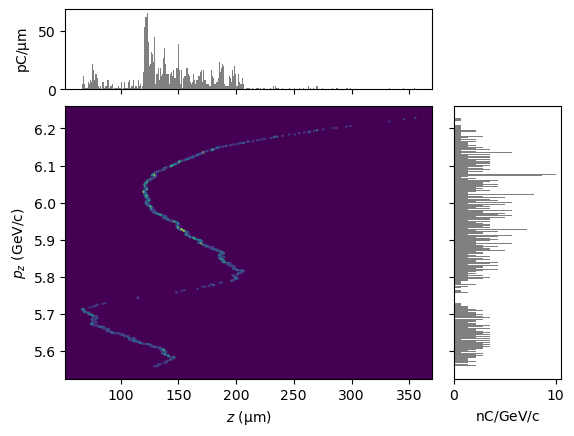




-8 -34
{'linearCompressionTerm': -0.007800000000000074, 'quadraticCompressionTerm': 0.1800000000000006, 'spacingUm': 48.952450743162224, 'driverLength': 2.4012086655511756e-05, 'witnessLength': 2.3643854591367023e-05, 'longestBunchLength': 2.4012086655511756e-05}


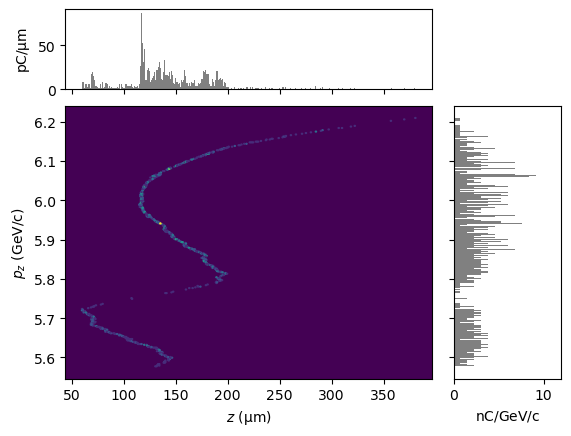




-8 -32
{'linearCompressionTerm': -0.004000000000000097, 'quadraticCompressionTerm': 0.20000000000000062, 'spacingUm': 44.950698490145776, 'driverLength': 2.3065980176814232e-05, 'witnessLength': 2.3967023963175736e-05, 'longestBunchLength': 2.3967023963175736e-05}


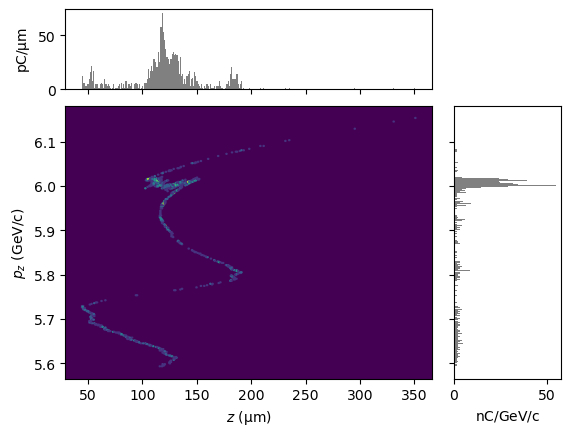




-8 -30
{'linearCompressionTerm': 0.00039999999999987615, 'quadraticCompressionTerm': 0.22500000000000064, 'spacingUm': 42.86991040188849, 'driverLength': 2.5429340208075734e-05, 'witnessLength': 2.5166469807578992e-05, 'longestBunchLength': 2.5429340208075734e-05}


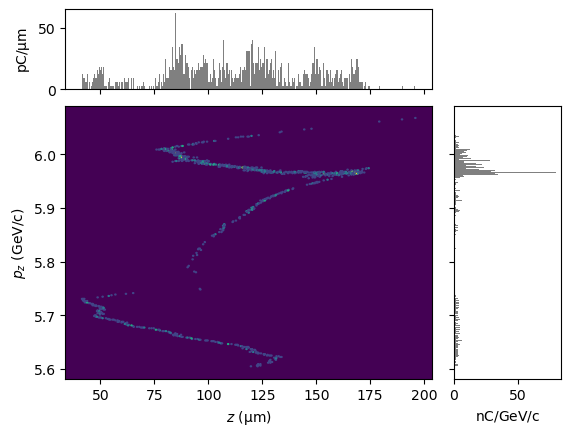




-8 -28
{'linearCompressionTerm': 0.004199999999999853, 'quadraticCompressionTerm': 0.2600000000000007, 'spacingUm': 44.928005196545875, 'driverLength': 5.73673419042938e-05, 'witnessLength': 5.78457594994803e-05, 'longestBunchLength': 5.78457594994803e-05}


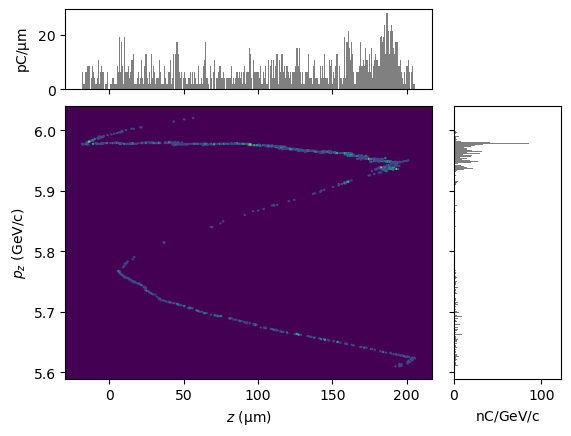




-8 -26
{'linearCompressionTerm': 0.012799999999999801, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 45.49251937185878, 'driverLength': 8.342721992585907e-05, 'witnessLength': 5.7460233663617205e-05, 'longestBunchLength': 8.342721992585907e-05}


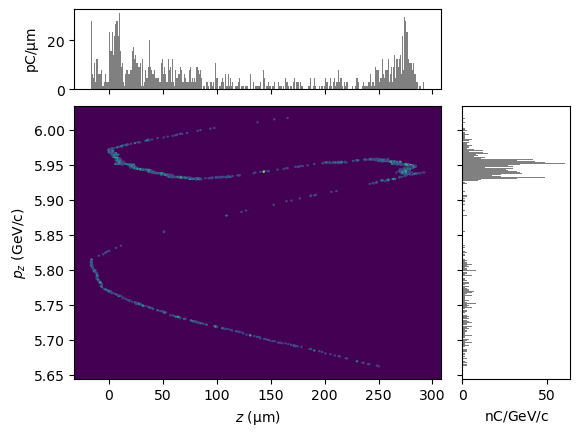




-8 -24
{'linearCompressionTerm': 0.017399999999999773, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 49.39598336489626, 'driverLength': 0.00012163629759044084, 'witnessLength': 9.766189264796224e-06, 'longestBunchLength': 0.00012163629759044084}


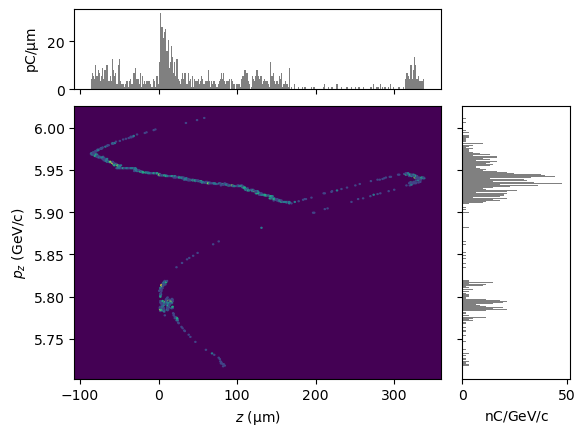




-8 -22



-8 -20



-8 -18



-8 -16



-8 -14



-8 -12



-8 -10



-8 -8



-8 -6



-8 -4



-8 -2



-6 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.24000000000000066, 'spacingUm': 45.04266531126227, 'driverLength': 0.00031562940683836865, 'witnessLength': 0.0001994843366356105, 'longestBunchLength': 0.00031562940683836865}


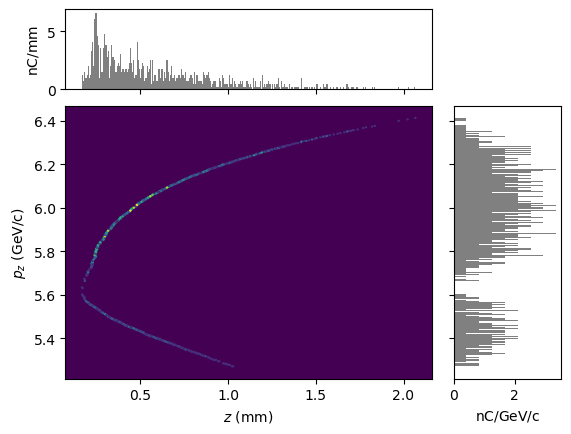




-6 -48
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.22000000000000064, 'spacingUm': 37.86889389895067, 'driverLength': 0.00021674641650085437, 'witnessLength': 0.00014177643429940179, 'longestBunchLength': 0.00021674641650085437}


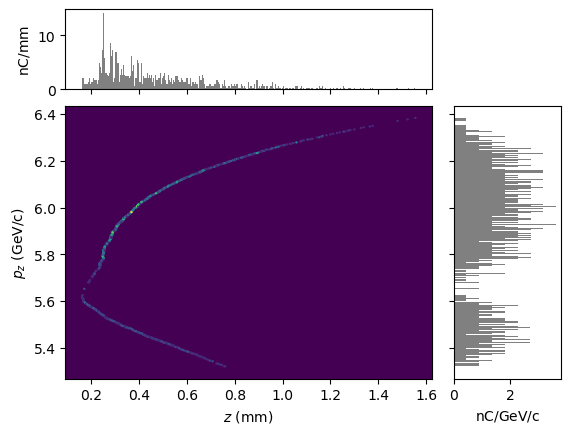




-6 -46
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.1900000000000006, 'spacingUm': 41.642358969854264, 'driverLength': 0.0001212590047101285, 'witnessLength': 8.855328415821445e-05, 'longestBunchLength': 0.0001212590047101285}


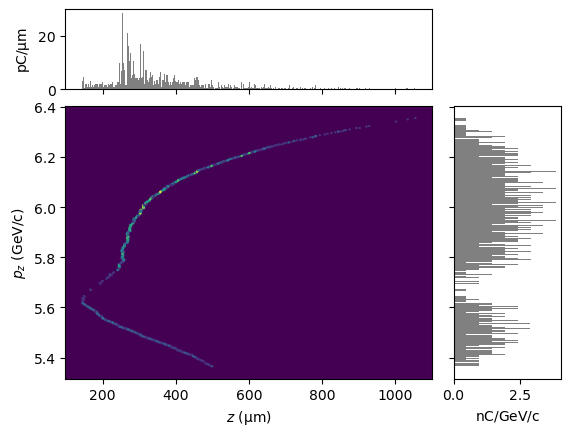




-6 -44
{'linearCompressionTerm': -0.0198, 'quadraticCompressionTerm': 0.1600000000000006, 'spacingUm': 46.761938903007895, 'driverLength': 4.296769525305615e-05, 'witnessLength': 5.071900837812993e-05, 'longestBunchLength': 5.071900837812993e-05}


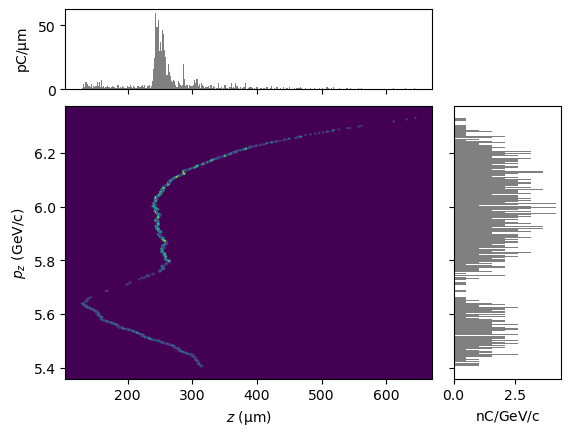




-6 -42
{'linearCompressionTerm': -0.019000000000000006, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 44.3990889605525, 'driverLength': 2.7395870406123625e-05, 'witnessLength': 2.2447135164333716e-05, 'longestBunchLength': 2.7395870406123625e-05}


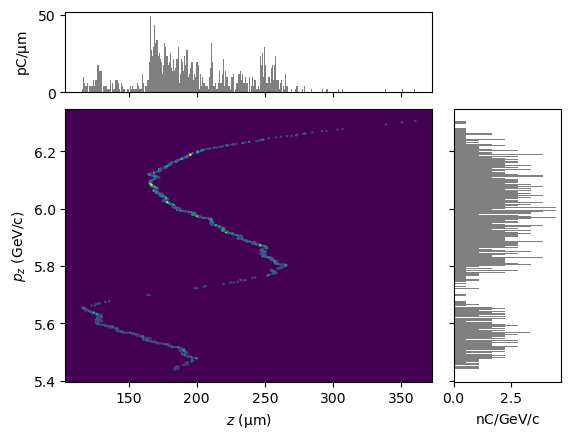




-6 -40
{'linearCompressionTerm': -0.016400000000000022, 'quadraticCompressionTerm': 0.15000000000000058, 'spacingUm': 48.85198845366729, 'driverLength': 2.319362445157559e-05, 'witnessLength': 2.5125517492117464e-05, 'longestBunchLength': 2.5125517492117464e-05}


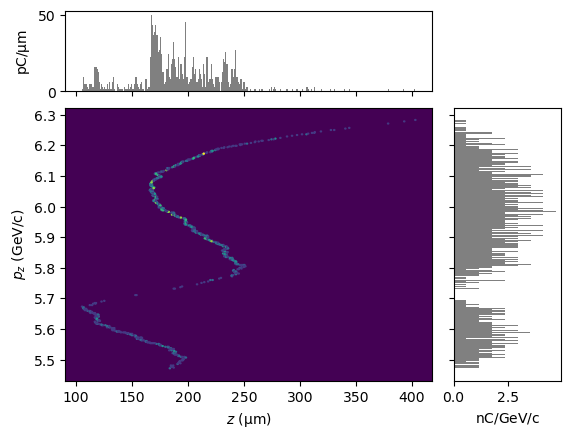




-6 -38
{'linearCompressionTerm': -0.014000000000000037, 'quadraticCompressionTerm': 0.15500000000000058, 'spacingUm': 49.59573146040962, 'driverLength': 2.5366505786542064e-05, 'witnessLength': 2.1698728366385534e-05, 'longestBunchLength': 2.5366505786542064e-05}


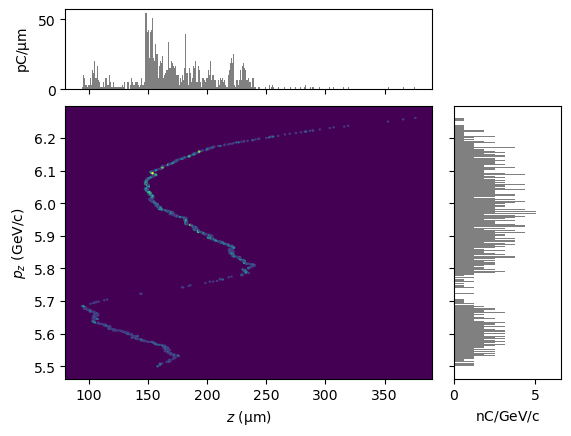




-6 -36
{'linearCompressionTerm': -0.011200000000000054, 'quadraticCompressionTerm': 0.1700000000000006, 'spacingUm': 46.33036599657964, 'driverLength': 2.440377302614084e-05, 'witnessLength': 2.413366546598534e-05, 'longestBunchLength': 2.440377302614084e-05}


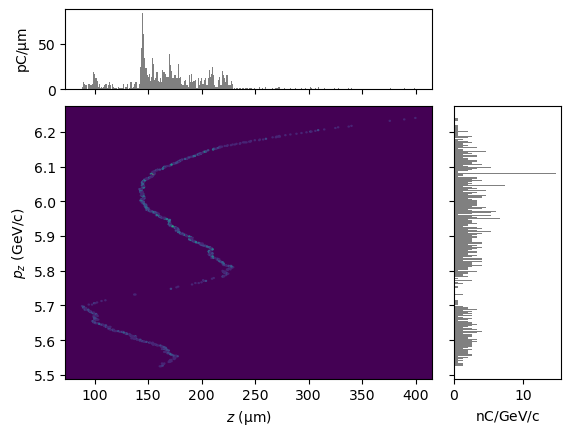




-6 -34
{'linearCompressionTerm': -0.008200000000000072, 'quadraticCompressionTerm': 0.1850000000000006, 'spacingUm': 45.619218065896256, 'driverLength': 2.487422851652382e-05, 'witnessLength': 2.5543027782458435e-05, 'longestBunchLength': 2.5543027782458435e-05}


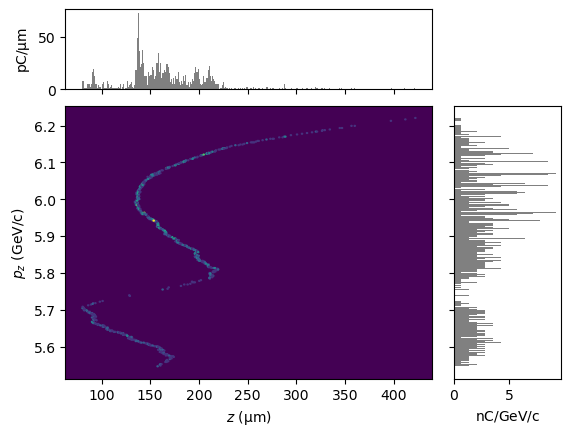




-6 -32
{'linearCompressionTerm': -0.004400000000000095, 'quadraticCompressionTerm': 0.20000000000000062, 'spacingUm': 48.91963549392389, 'driverLength': 2.3183574175405953e-05, 'witnessLength': 2.319537195517893e-05, 'longestBunchLength': 2.319537195517893e-05}


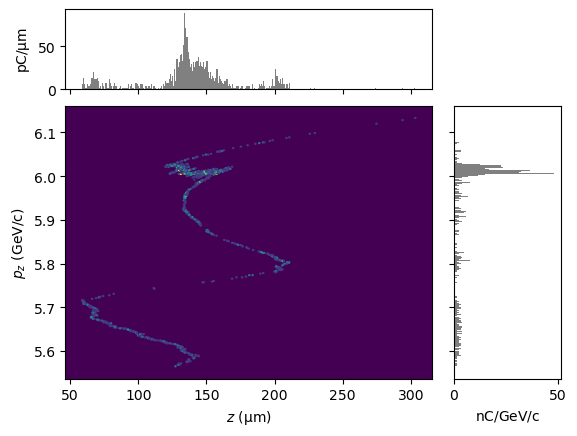




-6 -30
{'linearCompressionTerm': -1.214306433183765e-16, 'quadraticCompressionTerm': 0.22500000000000064, 'spacingUm': 43.8907050704856, 'driverLength': 2.4270755600990745e-05, 'witnessLength': 2.47518995300839e-05, 'longestBunchLength': 2.47518995300839e-05}


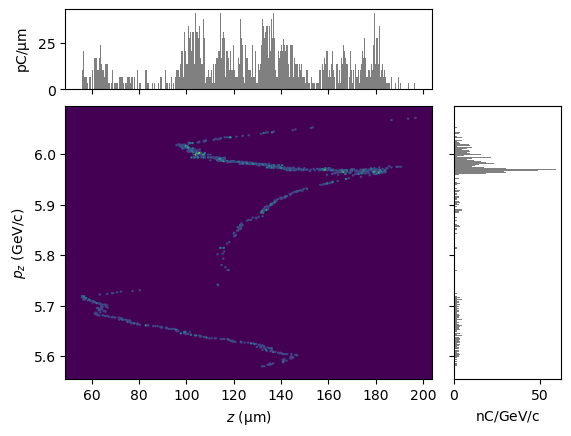




-6 -28
{'linearCompressionTerm': 0.004199999999999853, 'quadraticCompressionTerm': 0.25500000000000067, 'spacingUm': 46.431272547164895, 'driverLength': 5.049191785914782e-05, 'witnessLength': 4.979925963925768e-05, 'longestBunchLength': 5.049191785914782e-05}


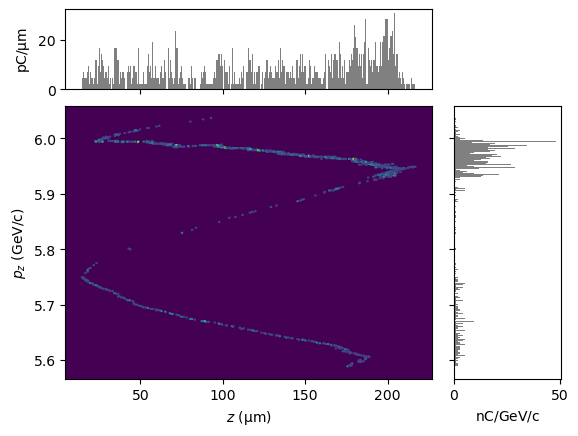




-6 -26
{'linearCompressionTerm': 0.011599999999999808, 'quadraticCompressionTerm': 0.48000000000000087, 'spacingUm': 47.38660939525139, 'driverLength': 8.130555935054208e-05, 'witnessLength': 8.11582175019209e-05, 'longestBunchLength': 8.130555935054208e-05}


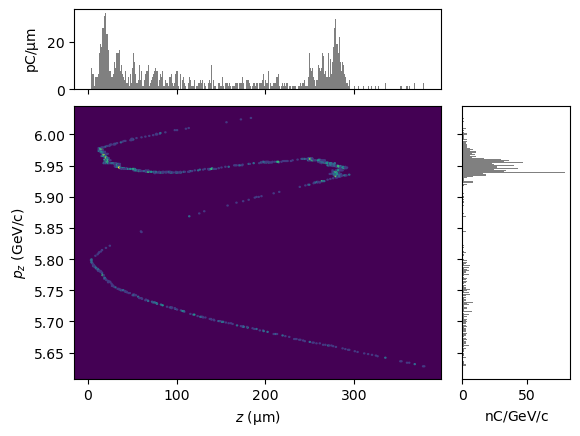




-6 -24
{'linearCompressionTerm': 0.016799999999999777, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 49.16246039345872, 'driverLength': 0.00011752026481737159, 'witnessLength': 2.8102984263869375e-05, 'longestBunchLength': 0.00011752026481737159}


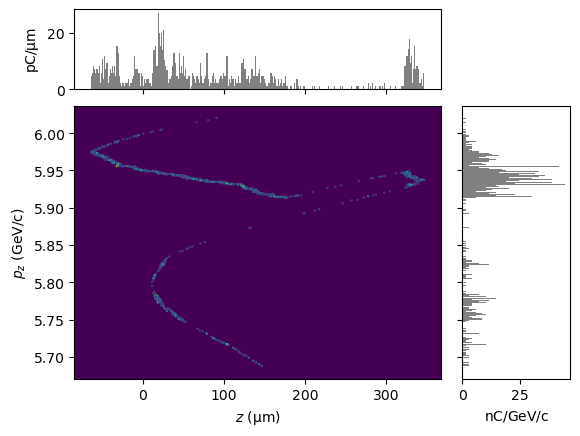




-6 -22



-6 -20



-6 -18



-6 -16



-6 -14



-6 -12



-6 -10



-6 -8



-6 -6



-6 -4



-6 -2



-4 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.23500000000000065, 'spacingUm': 43.205330455398986, 'driverLength': 0.00034898682218232284, 'witnessLength': 0.00023557298995620075, 'longestBunchLength': 0.00034898682218232284}


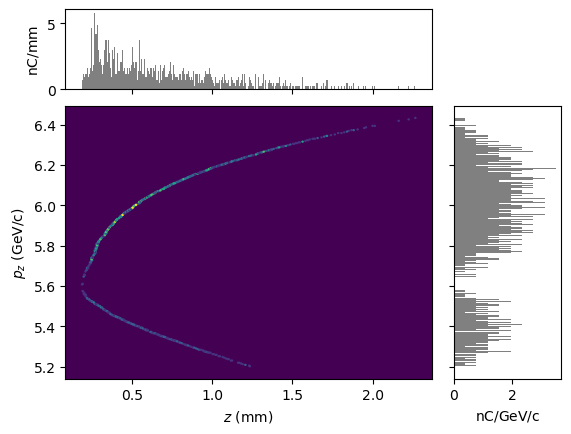




-4 -48



-4 -46
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.1900000000000006, 'spacingUm': 48.836468129433186, 'driverLength': 0.00014257165347539527, 'witnessLength': 0.00010362286891176008, 'longestBunchLength': 0.00014257165347539527}


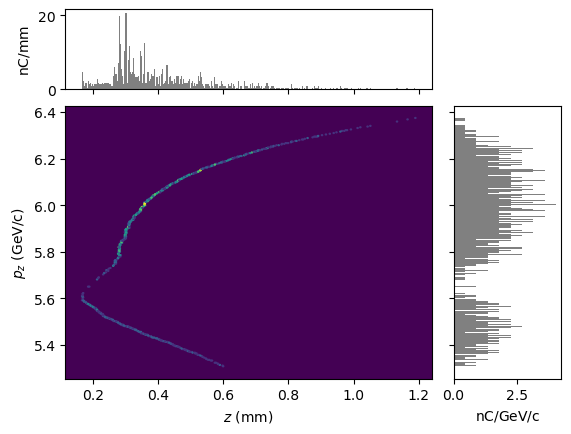




-4 -44
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.1600000000000006, 'spacingUm': 43.68989543940873, 'driverLength': 4.965428602023986e-05, 'witnessLength': 5.781332863311357e-05, 'longestBunchLength': 5.781332863311357e-05}


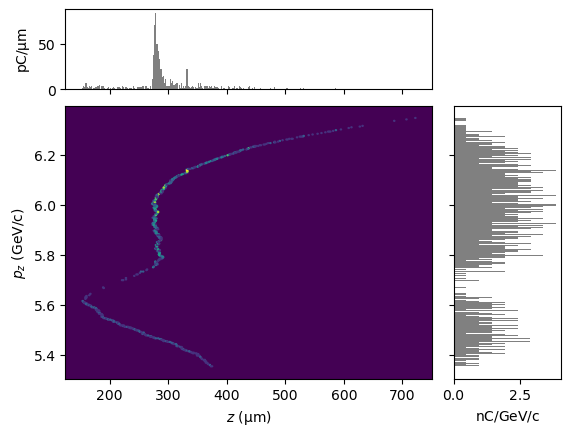




-4 -42
{'linearCompressionTerm': -0.019400000000000004, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 42.74800737480154, 'driverLength': 2.7940179673934046e-05, 'witnessLength': 2.5033083323119372e-05, 'longestBunchLength': 2.7940179673934046e-05}


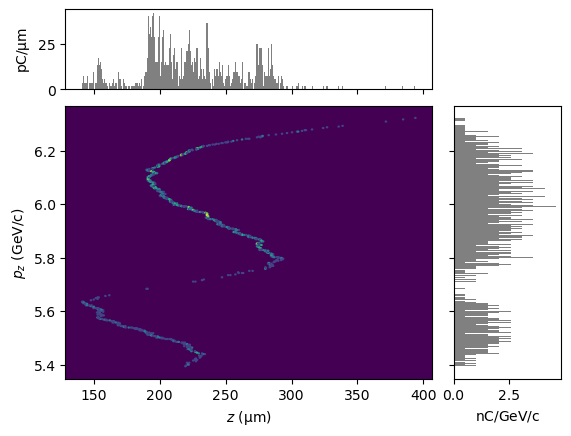




-4 -40
{'linearCompressionTerm': -0.01700000000000002, 'quadraticCompressionTerm': 0.14500000000000057, 'spacingUm': 47.679282895652555, 'driverLength': 2.7152968398881406e-05, 'witnessLength': 2.4174848449670776e-05, 'longestBunchLength': 2.7152968398881406e-05}


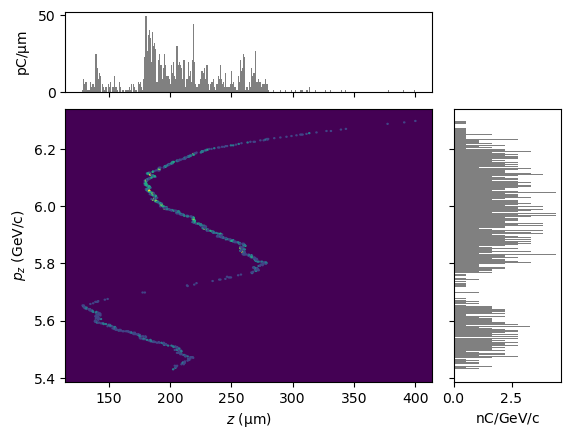




-4 -38
{'linearCompressionTerm': -0.014400000000000034, 'quadraticCompressionTerm': 0.15500000000000058, 'spacingUm': 49.96803964103921, 'driverLength': 2.6073229765019987e-05, 'witnessLength': 2.2598739159605193e-05, 'longestBunchLength': 2.6073229765019987e-05}


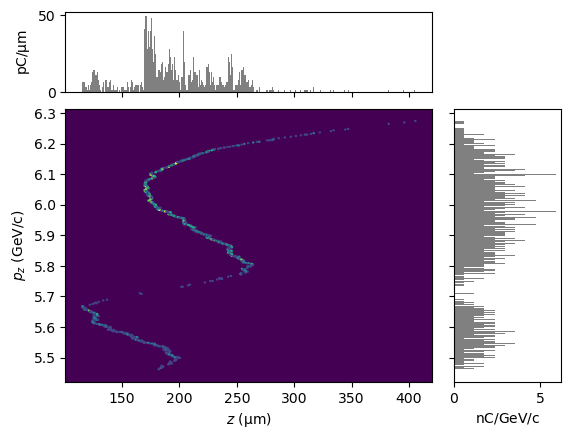




-4 -36
{'linearCompressionTerm': -0.011600000000000051, 'quadraticCompressionTerm': 0.1700000000000006, 'spacingUm': 46.96868571547495, 'driverLength': 2.4994700342765716e-05, 'witnessLength': 2.4842575922189984e-05, 'longestBunchLength': 2.4994700342765716e-05}


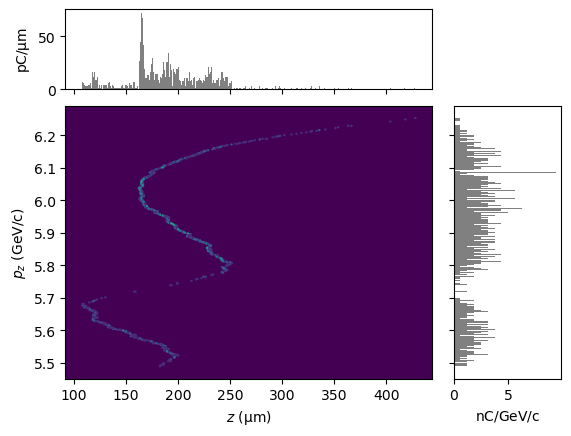




-4 -34
{'linearCompressionTerm': -0.00860000000000007, 'quadraticCompressionTerm': 0.1850000000000006, 'spacingUm': 46.00427846434378, 'driverLength': 2.5521697050120313e-05, 'witnessLength': 2.5878878626213478e-05, 'longestBunchLength': 2.5878878626213478e-05}


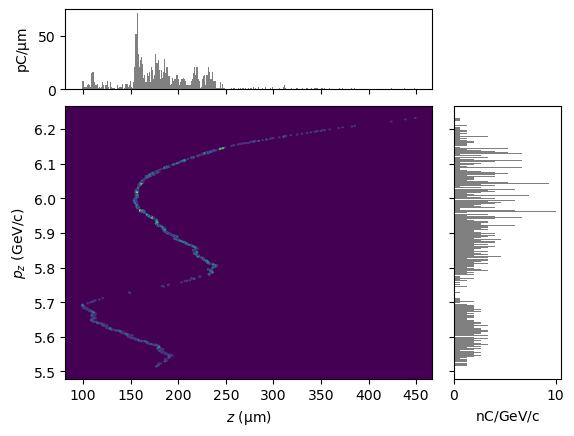




-4 -32
{'linearCompressionTerm': -0.004800000000000092, 'quadraticCompressionTerm': 0.20000000000000062, 'spacingUm': 49.381541797408, 'driverLength': 2.3870849613830736e-05, 'witnessLength': 2.297064622669037e-05, 'longestBunchLength': 2.3870849613830736e-05}


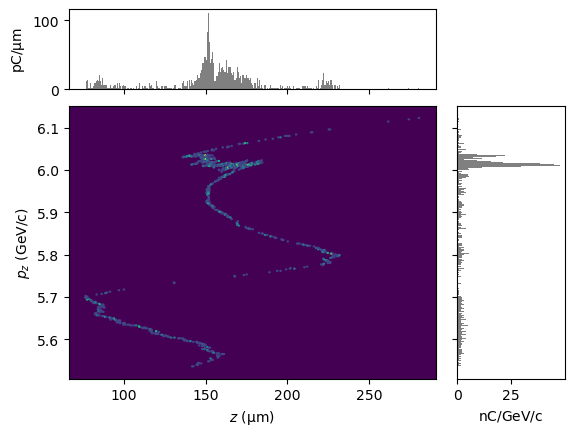




-4 -30
{'linearCompressionTerm': -0.0006000000000001178, 'quadraticCompressionTerm': 0.22000000000000064, 'spacingUm': 40.40385725387344, 'driverLength': 2.451204611952635e-05, 'witnessLength': 2.3576615849064744e-05, 'longestBunchLength': 2.451204611952635e-05}


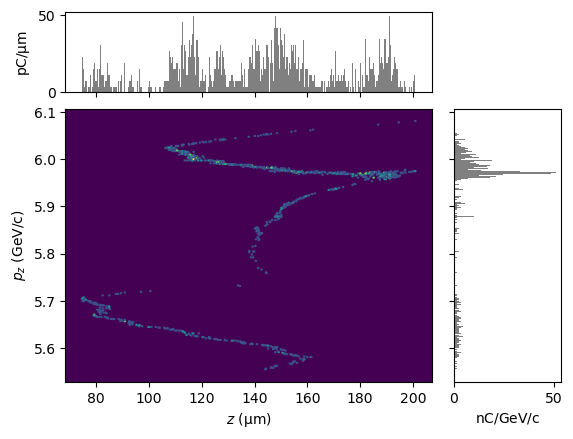




-4 -28
{'linearCompressionTerm': 0.004199999999999853, 'quadraticCompressionTerm': 0.25500000000000067, 'spacingUm': 43.32860458399347, 'driverLength': 4.529280176641889e-05, 'witnessLength': 4.5883624227422974e-05, 'longestBunchLength': 4.5883624227422974e-05}


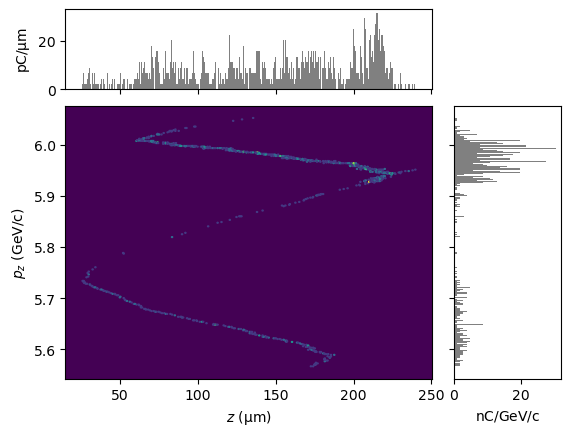




-4 -26
{'linearCompressionTerm': 0.00979999999999982, 'quadraticCompressionTerm': 0.4100000000000008, 'spacingUm': 49.34446103012691, 'driverLength': 8.365769843154867e-05, 'witnessLength': 8.408713006122439e-05, 'longestBunchLength': 8.408713006122439e-05}


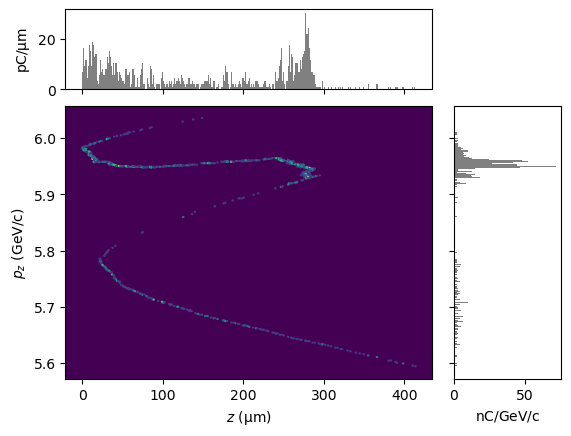




-4 -24
{'linearCompressionTerm': 0.01639999999999978, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 46.24706466585345, 'driverLength': 0.00011343753493521592, 'witnessLength': 4.115733167288968e-05, 'longestBunchLength': 0.00011343753493521592}


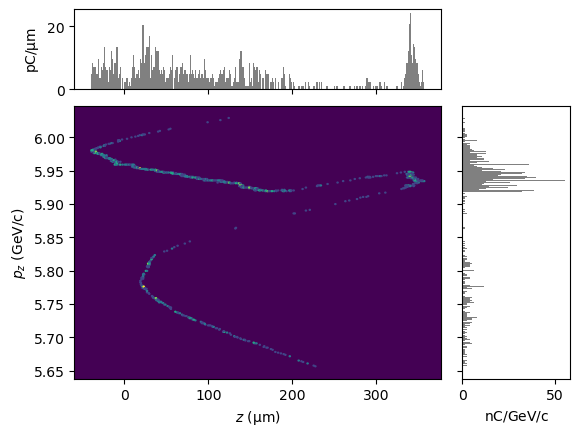




-4 -22



-4 -20



-4 -18



-4 -16



-4 -14



-4 -12



-4 -10



-4 -8



-4 -6



-4 -4



-4 -2



-2 -50
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.23000000000000065, 'spacingUm': 39.31736014817461, 'driverLength': 0.00038272720037734603, 'witnessLength': 0.00027659386769110663, 'longestBunchLength': 0.00038272720037734603}


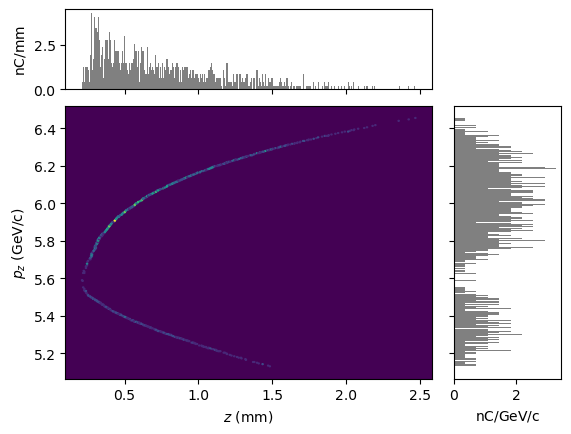




-2 -48
{'linearCompressionTerm': -0.02, 'quadraticCompressionTerm': 0.21500000000000064, 'spacingUm': 36.130792416645534, 'driverLength': 0.00027243694271341024, 'witnessLength': 0.0001969517711499129, 'longestBunchLength': 0.00027243694271341024}


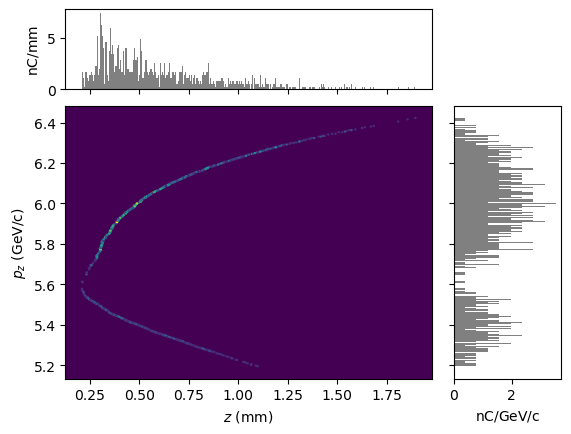




-2 -46



-2 -44
{'linearCompressionTerm': -0.0198, 'quadraticCompressionTerm': 0.1650000000000006, 'spacingUm': 48.729029419109146, 'driverLength': 7.295401941789082e-05, 'witnessLength': 7.082543452443195e-05, 'longestBunchLength': 7.295401941789082e-05}


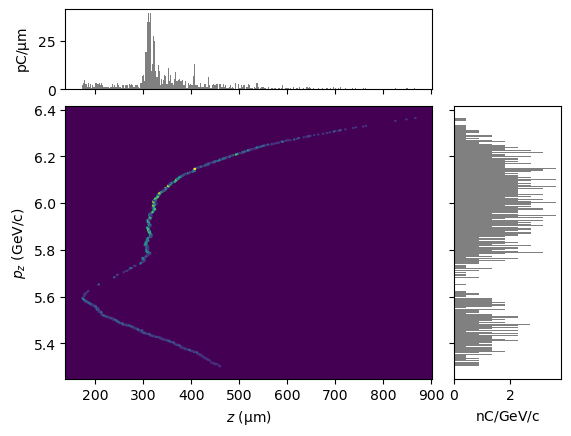




-2 -42
{'linearCompressionTerm': -0.0198, 'quadraticCompressionTerm': 0.13500000000000056, 'spacingUm': 36.08548887921103, 'driverLength': 2.88127788024712e-05, 'witnessLength': 2.904194049773579e-05, 'longestBunchLength': 2.904194049773579e-05}


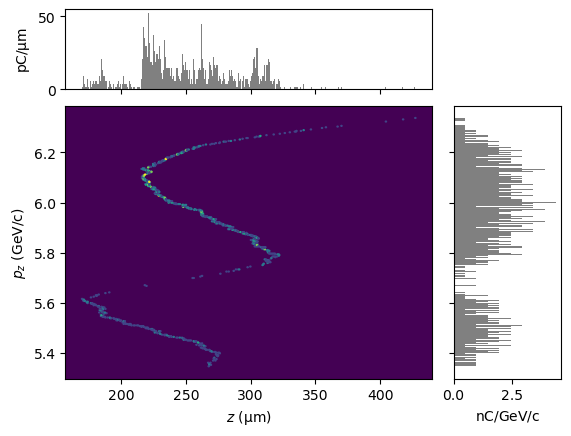




-2 -40
{'linearCompressionTerm': -0.017400000000000016, 'quadraticCompressionTerm': 0.14500000000000057, 'spacingUm': 40.97799475349172, 'driverLength': 2.8080479499664674e-05, 'witnessLength': 2.719799883488559e-05, 'longestBunchLength': 2.8080479499664674e-05}


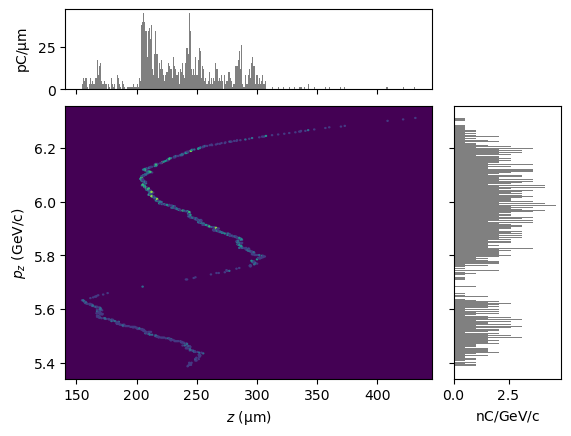




-2 -38
{'linearCompressionTerm': -0.014800000000000032, 'quadraticCompressionTerm': 0.15500000000000058, 'spacingUm': 45.57852540795602, 'driverLength': 2.693639409813757e-05, 'witnessLength': 2.4801860077195616e-05, 'longestBunchLength': 2.693639409813757e-05}


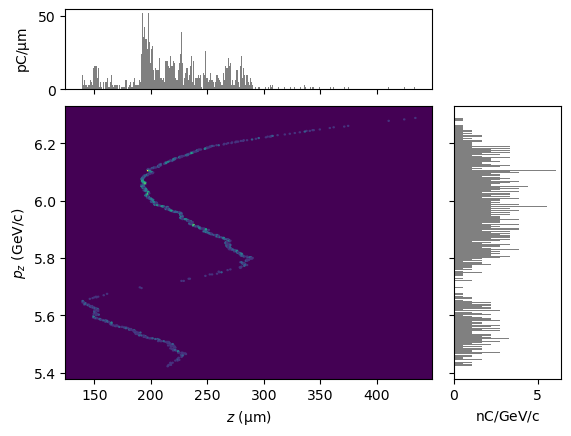




-2 -36
{'linearCompressionTerm': -0.012000000000000049, 'quadraticCompressionTerm': 0.1700000000000006, 'spacingUm': 43.90872368375848, 'driverLength': 2.5980579723389585e-05, 'witnessLength': 2.6557514856802553e-05, 'longestBunchLength': 2.6557514856802553e-05}


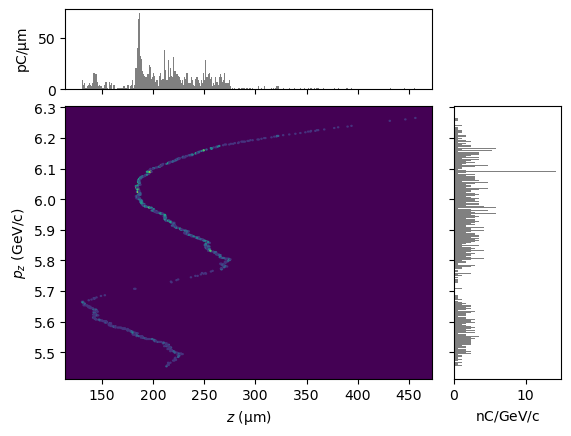




-2 -34
{'linearCompressionTerm': -0.009000000000000067, 'quadraticCompressionTerm': 0.1850000000000006, 'spacingUm': 43.12286206703805, 'driverLength': 2.604869900609009e-05, 'witnessLength': 2.6998471860631146e-05, 'longestBunchLength': 2.6998471860631146e-05}


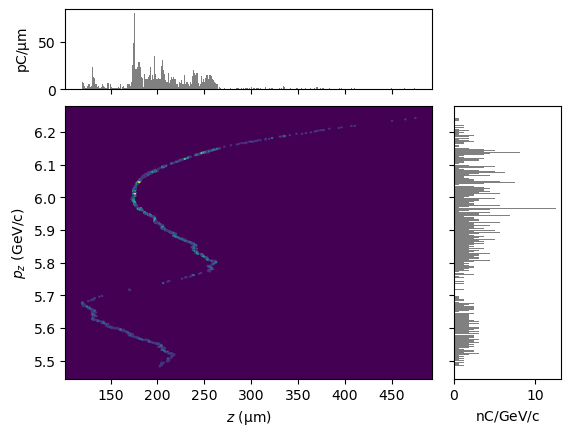




-2 -32
{'linearCompressionTerm': -0.00520000000000009, 'quadraticCompressionTerm': 0.20000000000000062, 'spacingUm': 46.3371589292449, 'driverLength': 2.3951433387545494e-05, 'witnessLength': 2.3296734232746168e-05, 'longestBunchLength': 2.3951433387545494e-05}


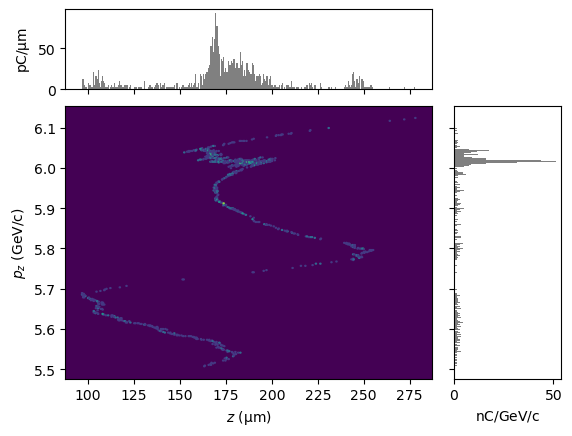




-2 -30
{'linearCompressionTerm': -0.0008000000000001166, 'quadraticCompressionTerm': 0.22000000000000064, 'spacingUm': 46.67222458678595, 'driverLength': 2.3658402129020142e-05, 'witnessLength': 2.26763411187806e-05, 'longestBunchLength': 2.3658402129020142e-05}


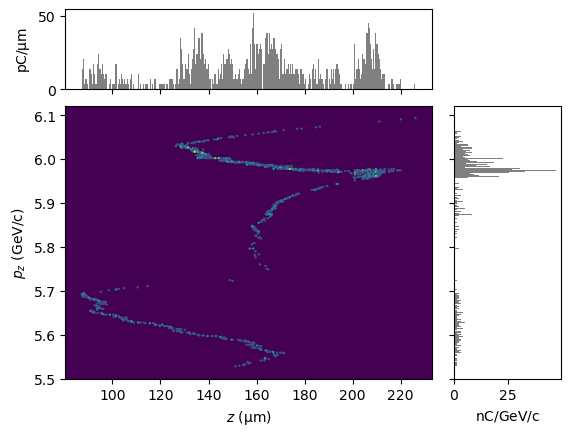




-2 -28
{'linearCompressionTerm': 0.003999999999999854, 'quadraticCompressionTerm': 0.25500000000000067, 'spacingUm': 44.19203511853083, 'driverLength': 4.2032246448518826e-05, 'witnessLength': 4.304357399856059e-05, 'longestBunchLength': 4.304357399856059e-05}


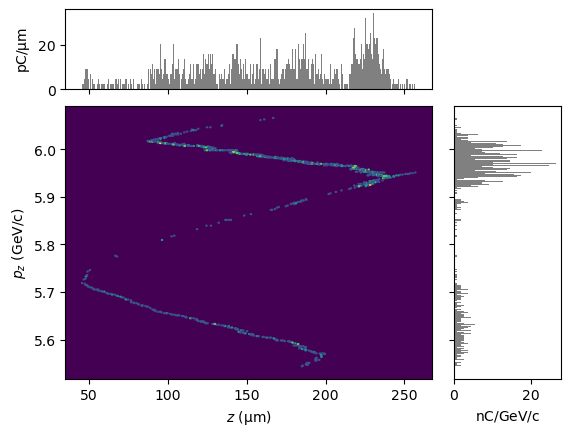




-2 -26
{'linearCompressionTerm': 0.008399999999999828, 'quadraticCompressionTerm': 0.36000000000000076, 'spacingUm': 41.312216141652726, 'driverLength': 8.702946458862389e-05, 'witnessLength': 8.606624736938954e-05, 'longestBunchLength': 8.702946458862389e-05}


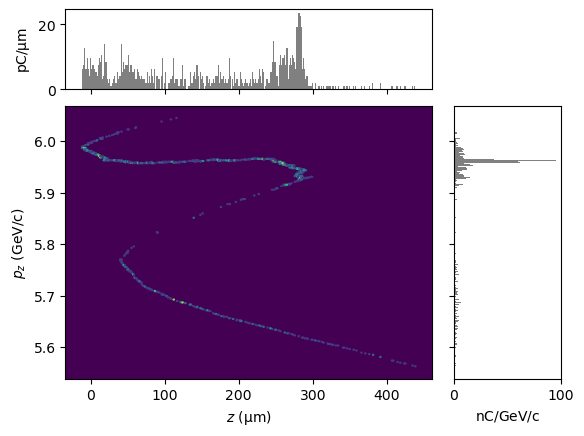




-2 -24
{'linearCompressionTerm': 0.01639999999999978, 'quadraticCompressionTerm': 0.4950000000000009, 'spacingUm': 47.59616403424738, 'driverLength': 0.00010933354355360712, 'witnessLength': 5.444293369701892e-05, 'longestBunchLength': 0.00010933354355360712}


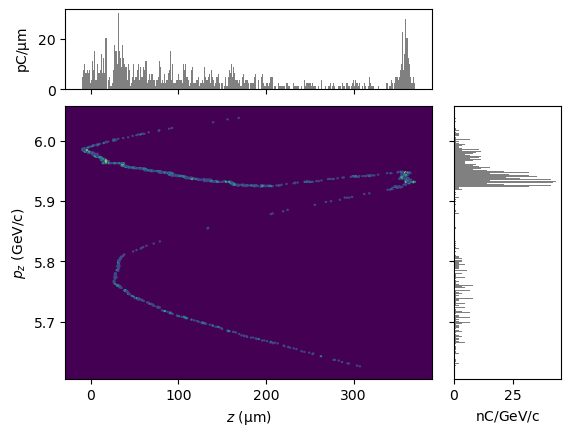




-2 -22



-2 -20



-2 -18



-2 -16



-2 -14



-2 -12



-2 -10



-2 -8



-2 -6



-2 -4



-2 -2


In [9]:
for L1PhaseSet in np.arange(-40, 0, 2):
    for L2PhaseSet in np.arange(-50, 0 , 2):
        
        print("\n\n")
        print(L1PhaseSet, L2PhaseSet)

        try: 
        
            #Set phases and track to BC20
            
            activeSettings = importedDefaultSettings | { "L1PhaseSet" : L1PhaseSet, "L2PhaseSet" : L2PhaseSet }
            
            setLattice(tao, **activeSettings)
            trackBeam(tao, trackEnd = "BEGBC20", **activeSettings)
            P = getBeamAtElement(tao, "BEGBC20")
    
    
    
    
            #Test all first and second order compression settings
            results = []
            
            for linearCompressionTerm in np.arange( -20e-3, 20e-3, 0.2e-3 ):
                for quadraticCompressionTerm in np.arange( -0.5, 0.5, 0.005 ):
                    
                    
                    PMod = P.copy()
                    
                    meanPz = np.mean( PMod.pz ) 
                    normalizedPz = ( PMod.pz - meanPz ) / meanPz
                    PMod.z = PMod.z + linearCompressionTerm * normalizedPz + quadraticCompressionTerm * normalizedPz ** 2
                    
                    PDrive, PWitness = getDriverAndWitness(PMod)
            
                    driverLength = smallestIntervalImpliedSigma( PDrive.z )
                    witnessLength = smallestIntervalImpliedSigma( PWitness.z )
                    
                    results.append(
                        {
                            "linearCompressionTerm" : linearCompressionTerm,
                            "quadraticCompressionTerm" : quadraticCompressionTerm, 
                            "spacingUm" : 1e6 * (np.median(PDrive.z) - np.median(PWitness.z)),
                            "driverLength" : driverLength,
                            "witnessLength" : witnessLength,
                            "longestBunchLength" : max(driverLength, witnessLength)
                        }
                    )
        
    
    
            #Find and apply the best setting
    
            bestDict = getBestCase(results)
    
            linearCompressionTerm = bestDict["linearCompressionTerm"]
            quadraticCompressionTerm = bestDict["quadraticCompressionTerm"]
            
            
            
            PMod = P.copy()
            
            meanPz = np.mean( PMod.pz ) 
            normalizedPz = ( PMod.pz - meanPz ) / meanPz
            PMod.z = PMod.z + linearCompressionTerm * normalizedPz + quadraticCompressionTerm * normalizedPz ** 2
            
            # print(linearCompressionTerm, ", ", quadraticCompressionTerm) 
            # display(plotMod(PMod, 'z', 'pz', bins=300))
            # plt.clf()
            
            # PDrive, PWitness = getDriverAndWitness(PMod)
    
    
    
    
            #Only show results which are within tolerable spacing
            if abs(bestDict["spacingUm"] - targetSpacingUm) < 10: 
                print(bestDict)
                display(plotMod(PMod, 'z', 'pz', bins=300))

        except:
            print("FAILED")